<a id='exec-sum'></a>
## EXECUTIVE SUMMARY

### *Sarsa Lambda Method*:

|Rewards   |   |Parameters | 
:---        |    :----:   |  :----  |
| Crashing wall: -5 , each_step : 0, terminal_state: 10|  |lambda: 1, eps: 0.1, gamma: 0.9, alpha:0.1, iteration: 300| 
| Crashing wall: -5 , each_step : 0, terminal_state: 10 | |lambda: 0.95, eps: 0.1, gamma: 0.9, alpha:0.1, iteration: 300|
| Crashing wall: -5 , each_step : 0, terminal_state: 10 | |lambda: 0, eps: 0.1, gamma: 0.9, alpha:0.1, iteration: 300|
| Crashing wall: -5 , each_step : -1, terminal_state: 10 | |lambda: 1, eps: 0.1, gamma: 0.7, alpha:0.4, iteration: 300|
| Crashing wall: -5 , each_step : -1, terminal_state: 10 ||lambda: 1, eps: 0.05, gamma: 0.7, alpha:0.4, iteration: 300|
| Crashing wall: -5 , each_step : -1, terminal_state: 10 ||lambda: 1, eps: 0.05, gamma: 0.8, alpha:0.2, iteration: 500|
| Crashing wall: -5 , each_step : -1, terminal_state: 10 ||lambda: 1, eps: dynamic, gamma: 0.7, alpha:0.4, iteration: 500|
| Crashing wall: -5 , each_step : -1 ||lambda: 1, eps: dynamic, gamma: 0.7, alpha:0.4, iteration: 500|
| Crashing wall: -5 , each_step : -1 ||lambda: 1, eps: dynamic, gamma: 0.7, alpha:0.4, iteration: 15000|
| Crashing wall: -5 , each_step : -1 ||lambda: 1, eps: dynamic, gamma: 0.8, alpha:0.2, iteration: 15000|

#### *Results*:

If the agent is rewarded when the reach terminal state and given penalty when crash the wall, learning the map which enables to agent as fast as possible to finishing line without crashing the wall. Decreasing lambda led to moving more steps from initial position to terminal position compare to running the code with higher lambda.

If the agent is rewarded when the reach terminal state and given penalty when crash the wall or taken each action, and function parameters set to gamma is 0.8, alpha = 0.2 and epsilon = 0.05, agent reach more accurent results after 500 iteration compared to function parameters set to gamma is 0.7, alpha = 0.4 and epsilon = 0.05.

Although dynamic epsilon approach does not give acceptable result under 500 iteration, after 4000 iteration agent start to take action more accurately.

If the agent is not rewarded at the terminal station, number of iteration can be increased otherwise characteristic of function is waved, not shows decreasing trend.

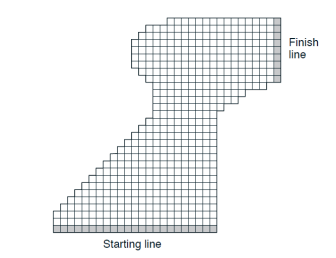

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
course = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  ], dtype=np.int32)

In [3]:
states=[]
for i in range(len(course)):
    for j in range(len(course[1])):
        for vu in range(5):
            for vr in range(5):
                states.append((i,j,vu,vr))

In [4]:
def is_terminal(state):
    return course[state[0],state[1]]==3

In [5]:
def is_wall(state):
    return course[state[0],state[1]]==1

In [6]:
def is_start(state):
    return course[state[0],state[1]]==2

In [7]:
def random_initial_state():
    x=np.random.choice(np.where(course==2)[0])
    y=np.random.choice(np.where(course==2)[1])
    return((x,y,0,0))

In [8]:
random_initial_state()

(33, 16, 0, 0)

In [9]:
ACTION_SPACE = ('DZ', 'DD', 'DU', 'UZ', 'UD', 'UU','ZZ','ZD', 'ZU') 

# upward velocity _ rightward velocity --->
# D --> Decrease velocity, Z --> not change velocity, U --> increase velocity
# Example 'DD' means that upward velocity is -1 & right velocity is -1.

In [12]:
actions_sub = []
for i in range(len(course)):
    for j in range(len(course[1])):
        for vu in range(5):
            for vr in range(5):
                if is_wall((i,j,vu,vr)) == True:
                    continue
                else:
                    for k in ACTION_SPACE:
                        if (k == 'ZZ') & (vu==0) & (vr==0):
                            continue
                        elif (k == 'DZ') & ((vu==0) | ((vu==1) & (vr==0))) :
                            continue
                        elif (k == 'DD') & (((vu==0) | (vr==0)) | ((vu==1) & (vr==1))):
                            continue
                        elif (k == 'DU') & ((vu==0) | (vr==4)):
                            continue
                        elif (k == 'UZ') & (vu==4):
                            continue
                        elif (k == 'UD') & ((vu==4) | (vr==0)) :
                            continue
                        elif (k == 'UU') & ((vu==4) | (vr==4)) :
                            continue
                        elif (k == 'ZD') & ((vr==0) | ((vr==1) & (vu==0))) :
                            continue
                        elif (k == 'ZU') & (vr==4):
                            continue
                        else:
                            state = (i,j,vu,vr)
                            actions_sub.append((state,k))
actions = pd.DataFrame(actions_sub)
actions.rename(columns={
    0:'states',
    1: 'action'
},inplace=True)

In [13]:
actions

states action
0       (4, 15, 0, 0)     UZ
1       (4, 15, 0, 0)     UU
2       (4, 15, 0, 0)     ZU
3       (4, 15, 0, 1)     UZ
4       (4, 15, 0, 1)     UD
...               ...    ...
85135  (33, 22, 4, 3)     ZU
85136  (33, 22, 4, 4)     DZ
85137  (33, 22, 4, 4)     DD
85138  (33, 22, 4, 4)     ZZ
85139  (33, 22, 4, 4)     ZD

[85140 rows x 2 columns]

In [168]:
def get_rewards(state):
    if is_wall(state) == True:
        return -5
    elif is_terminal(state) == True:
        return 10
    else:
        return 0

In [169]:
def get_next_state(s, a):
    # this answers: where would I end up if I perform action 'a' in state 's'?
    i, j, v_up, v_right = s[0], s[1], s[2], s[3]
    # if this action moves you somewhere else, then it will be in this dictionary
    if is_wall(s) == False:
        if a in np.array(actions[actions.states == (i,j,v_up,v_right)].action ) :
            if  (a == 'DD') :
                v_up -= 1
                v_right -= 1  
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'DZ') :
                v_up -= 1
                v_right -= 0
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'DU') :
                v_up -= 1
                v_right += 1
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif  (a == 'ZD') :
                v_up -= 0
                v_right -= 1 
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>=course.shape[1]:
                    j = course.shape[1]-1

            elif  (a == 'ZZ') :
                v_up -= 0
                v_right -= 0
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'ZU') :
                v_up -= 0
                v_right += 1
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'UD'):
                v_up += 1
                v_right -= 1
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>=course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'UZ') :
                v_up += 1
                v_right -= 0
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'UU') :
                v_up += 1
                v_right += 1                
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>=course.shape[1]:
                    j = course.shape[1]-1
    else:
        pass

    return i, j, v_up, v_right

In [171]:
transition_probs = {}
rewards = {}
for s in states:
    if (not is_terminal(s)) & (not is_wall(s)) :
        for a in ACTION_SPACE:
            s2 = get_next_state(s, a)
            transition_probs[(s, a, s2)] = 1
            rewards[(s, a, s2)] = get_rewards((s2[0],s2[1]))

In [172]:
transition_probs

{((4, 15, 0, 0), 'DZ', (4, 15, 0, 0)): 1,
 ((4, 15, 0, 0), 'DD', (4, 15, 0, 0)): 1,
 ((4, 15, 0, 0), 'DU', (4, 15, 0, 0)): 1,
 ((4, 15, 0, 0), 'UZ', (3, 15, 1, 0)): 1,
 ((4, 15, 0, 0), 'UD', (4, 15, 0, 0)): 1,
 ((4, 15, 0, 0), 'UU', (3, 16, 1, 1)): 1,
 ((4, 15, 0, 0), 'ZZ', (4, 15, 0, 0)): 1,
 ((4, 15, 0, 0), 'ZD', (4, 15, 0, 0)): 1,
 ((4, 15, 0, 0), 'ZU', (4, 16, 0, 1)): 1,
 ((4, 15, 0, 1), 'DZ', (4, 15, 0, 1)): 1,
 ((4, 15, 0, 1), 'DD', (4, 15, 0, 1)): 1,
 ((4, 15, 0, 1), 'DU', (4, 15, 0, 1)): 1,
 ((4, 15, 0, 1), 'UZ', (3, 16, 1, 1)): 1,
 ((4, 15, 0, 1), 'UD', (3, 15, 1, 0)): 1,
 ((4, 15, 0, 1), 'UU', (3, 17, 1, 2)): 1,
 ((4, 15, 0, 1), 'ZZ', (4, 16, 0, 1)): 1,
 ((4, 15, 0, 1), 'ZD', (4, 15, 0, 1)): 1,
 ((4, 15, 0, 1), 'ZU', (4, 17, 0, 2)): 1,
 ((4, 15, 0, 2), 'DZ', (4, 15, 0, 2)): 1,
 ((4, 15, 0, 2), 'DD', (4, 15, 0, 2)): 1,
 ((4, 15, 0, 2), 'DU', (4, 15, 0, 2)): 1,
 ((4, 15, 0, 2), 'UZ', (3, 17, 1, 2)): 1,
 ((4, 15, 0, 2), 'UD', (3, 16, 1, 1)): 1,
 ((4, 15, 0, 2), 'UU', (3, 18, 1, 

## SARSA Lambda

In [173]:
def max_dict(d):
    # returns the argmax (key) and max (value) from a dictionary
    # put this into a function since we are using it so often

    # find max val
    max_val = max(d.values())

    # find keys corresponding to max val
    max_keys = [key for key, val in d.items() if val == max_val]
    #print(max_keys,max_val)
    return np.random.choice(max_keys), max_val

In [174]:
def epsilon_greedy(Q, s, eps=0.1):
    if np.random.random() < eps:
        return np.random.choice(ACTION_SPACE)
    else:
        a_opt = max_dict(Q[s])[0]
        #print(a_opt)
    return a_opt

In [175]:
def SARSA(LAMBDA,n_episodes):
    GAMMA = 0.9
    ALPHA = 0.1
    total_movement=[]
    # initialize Q(s,a) and eligibility traces
    Q = {}
    E={}
    for s in states:
        Q[s] = {}
        E[s]={}
        for a in ACTION_SPACE:
            Q[s][a] = 0

    for it in range(n_episodes):
        print(it,'######################################################################################\n\n')
        movement=0
        for s in states:
            for a in ACTION_SPACE:
                E[s][a] = 0
        s= random_initial_state()
        a = epsilon_greedy(Q, s, eps=0.1)
        visited_state_action={}
        while ( is_terminal(s) == False ):
            if (s,a) not in visited_state_action.keys():
                visited_state_action[(s,a)]=[]
            s2 = get_next_state(s, a)
            r = rewards.get((s, a, s2))
            a2 = epsilon_greedy(Q, s2, eps=0.1)
            delta=r + GAMMA*Q[s2][a2] - Q[s][a]
            E[s][a]=E[s][a]+1
            for (s,a) in visited_state_action.keys():
#            for s in States:
#                for a in ACTION_SPACE:
                    Q[s][a] = Q[s][a] + ALPHA*delta*E[s][a]
                    E[s][a] = E[s][a]*GAMMA*LAMBDA
            #print(s)
            #print(s2)
            if (is_wall(s2) != 1):
            # next state becomes current state
                s = s2
                a = a2
                #print(s)
                movement +=1
            else :
                s = random_initial_state()
                a = epsilon_greedy(Q, s, eps=0.1)
                #print('crash the wall:',s)
                movement +=1
        total_movement.append(movement)
        df_total_movement = pd.DataFrame(total_movement)
        rol_total_movement = df_total_movement.rolling(50).mean()
    plt.rcParams["figure.figsize"] = [15.50, 10.50]
    plt.plot(rol_total_movement)
    plt.title('Number of Movement - Iteration', fontsize=24)
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('NUmber of Movement', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    policy = {}
    V = {}
    for s in states:
        a, max_q = max_dict(Q[s])
        policy[s]= a
        V[s] = max_q
    return V,policy

### Lambda = 1

0 ######################################################################################


1 ######################################################################################


2 ######################################################################################


3 ######################################################################################


4 ######################################################################################


5 ######################################################################################


6 ######################################################################################


7 ######################################################################################


8 ######################################################################################


9 ######################################################################################


10 ######################################################################################


90 ######################################################################################


91 ######################################################################################


92 ######################################################################################


93 ######################################################################################


94 ######################################################################################


95 ######################################################################################


96 ######################################################################################


97 ######################################################################################


98 ######################################################################################


99 ######################################################################################


100 ############################################################################

179 ######################################################################################


180 ######################################################################################


181 ######################################################################################


182 ######################################################################################


183 ######################################################################################


184 ######################################################################################


185 ######################################################################################


186 ######################################################################################


187 ######################################################################################


188 ######################################################################################


189 ##################################################################

268 ######################################################################################


269 ######################################################################################


270 ######################################################################################


271 ######################################################################################


272 ######################################################################################


273 ######################################################################################


274 ######################################################################################


275 ######################################################################################


276 ######################################################################################


277 ######################################################################################


278 ##################################################################

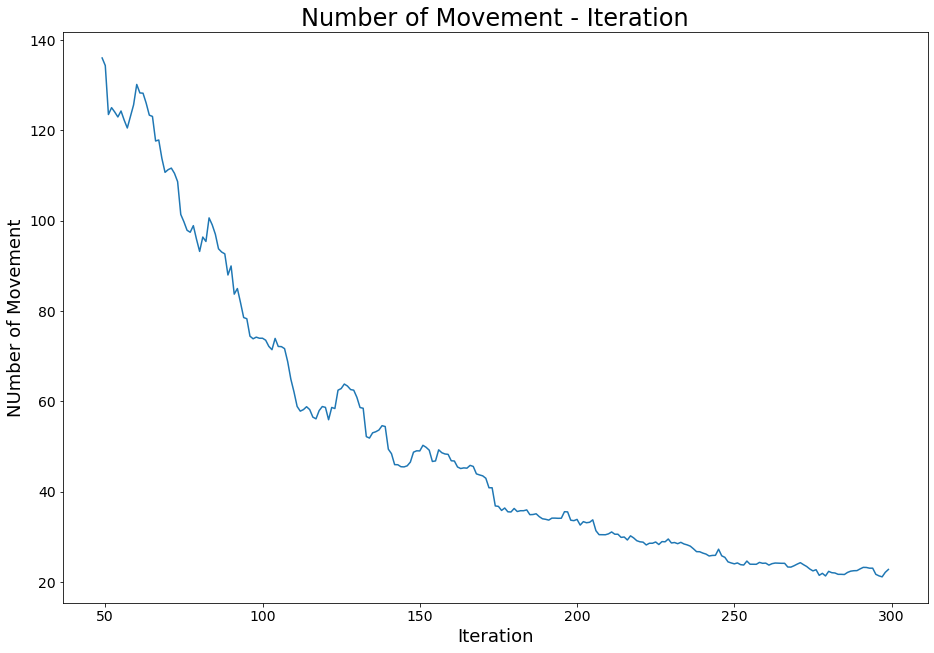

In [74]:
np.random.seed(10)
V,policy=SARSA(LAMBDA=1,n_episodes=300)

In [77]:
policy

{(0, 0, 0, 0): 'ZZ',
 (0, 0, 0, 1): 'DD',
 (0, 0, 0, 2): 'ZD',
 (0, 0, 0, 3): 'DD',
 (0, 0, 0, 4): 'ZZ',
 (0, 0, 1, 0): 'DD',
 (0, 0, 1, 1): 'ZU',
 (0, 0, 1, 2): 'DD',
 (0, 0, 1, 3): 'UD',
 (0, 0, 1, 4): 'UZ',
 (0, 0, 2, 0): 'UD',
 (0, 0, 2, 1): 'UZ',
 (0, 0, 2, 2): 'UU',
 (0, 0, 2, 3): 'DD',
 (0, 0, 2, 4): 'DD',
 (0, 0, 3, 0): 'ZD',
 (0, 0, 3, 1): 'DD',
 (0, 0, 3, 2): 'UZ',
 (0, 0, 3, 3): 'UD',
 (0, 0, 3, 4): 'DD',
 (0, 0, 4, 0): 'ZD',
 (0, 0, 4, 1): 'UZ',
 (0, 0, 4, 2): 'UU',
 (0, 0, 4, 3): 'ZZ',
 (0, 0, 4, 4): 'DD',
 (0, 1, 0, 0): 'DZ',
 (0, 1, 0, 1): 'UU',
 (0, 1, 0, 2): 'ZZ',
 (0, 1, 0, 3): 'UU',
 (0, 1, 0, 4): 'DU',
 (0, 1, 1, 0): 'ZD',
 (0, 1, 1, 1): 'UZ',
 (0, 1, 1, 2): 'DD',
 (0, 1, 1, 3): 'ZZ',
 (0, 1, 1, 4): 'DU',
 (0, 1, 2, 0): 'DU',
 (0, 1, 2, 1): 'UD',
 (0, 1, 2, 2): 'DD',
 (0, 1, 2, 3): 'ZZ',
 (0, 1, 2, 4): 'ZD',
 (0, 1, 3, 0): 'ZZ',
 (0, 1, 3, 1): 'UD',
 (0, 1, 3, 2): 'UD',
 (0, 1, 3, 3): 'UU',
 (0, 1, 3, 4): 'UD',
 (0, 1, 4, 0): 'UZ',
 (0, 1, 4, 1): 'ZD',
 (0, 1, 4, 2)

In [83]:
V

{(0, 0, 0, 0): 0,
 (0, 0, 0, 1): 0,
 (0, 0, 0, 2): 0,
 (0, 0, 0, 3): 0,
 (0, 0, 0, 4): 0,
 (0, 0, 1, 0): 0,
 (0, 0, 1, 1): 0,
 (0, 0, 1, 2): 0,
 (0, 0, 1, 3): 0,
 (0, 0, 1, 4): 0,
 (0, 0, 2, 0): 0,
 (0, 0, 2, 1): 0,
 (0, 0, 2, 2): 0,
 (0, 0, 2, 3): 0,
 (0, 0, 2, 4): 0,
 (0, 0, 3, 0): 0,
 (0, 0, 3, 1): 0,
 (0, 0, 3, 2): 0,
 (0, 0, 3, 3): 0,
 (0, 0, 3, 4): 0,
 (0, 0, 4, 0): 0,
 (0, 0, 4, 1): 0,
 (0, 0, 4, 2): 0,
 (0, 0, 4, 3): 0,
 (0, 0, 4, 4): 0,
 (0, 1, 0, 0): 0,
 (0, 1, 0, 1): 0,
 (0, 1, 0, 2): 0,
 (0, 1, 0, 3): 0,
 (0, 1, 0, 4): 0,
 (0, 1, 1, 0): 0,
 (0, 1, 1, 1): 0,
 (0, 1, 1, 2): 0,
 (0, 1, 1, 3): 0,
 (0, 1, 1, 4): 0,
 (0, 1, 2, 0): 0,
 (0, 1, 2, 1): 0,
 (0, 1, 2, 2): 0,
 (0, 1, 2, 3): 0,
 (0, 1, 2, 4): 0,
 (0, 1, 3, 0): 0,
 (0, 1, 3, 1): 0,
 (0, 1, 3, 2): 0,
 (0, 1, 3, 3): 0,
 (0, 1, 3, 4): 0,
 (0, 1, 4, 0): 0,
 (0, 1, 4, 1): 0,
 (0, 1, 4, 2): 0,
 (0, 1, 4, 3): 0,
 (0, 1, 4, 4): 0,
 (0, 2, 0, 0): 0,
 (0, 2, 0, 1): 0,
 (0, 2, 0, 2): 0,
 (0, 2, 0, 3): 0,
 (0, 2, 0, 4): 0,
 (0, 2, 1,

### Lambda = 0.95

0 ######################################################################################


1 ######################################################################################


2 ######################################################################################


3 ######################################################################################


4 ######################################################################################


5 ######################################################################################


6 ######################################################################################


7 ######################################################################################


8 ######################################################################################


9 ######################################################################################


10 ######################################################################################


90 ######################################################################################


91 ######################################################################################


92 ######################################################################################


93 ######################################################################################


94 ######################################################################################


95 ######################################################################################


96 ######################################################################################


97 ######################################################################################


98 ######################################################################################


99 ######################################################################################


100 ############################################################################

179 ######################################################################################


180 ######################################################################################


181 ######################################################################################


182 ######################################################################################


183 ######################################################################################


184 ######################################################################################


185 ######################################################################################


186 ######################################################################################


187 ######################################################################################


188 ######################################################################################


189 ##################################################################

268 ######################################################################################


269 ######################################################################################


270 ######################################################################################


271 ######################################################################################


272 ######################################################################################


273 ######################################################################################


274 ######################################################################################


275 ######################################################################################


276 ######################################################################################


277 ######################################################################################


278 ##################################################################

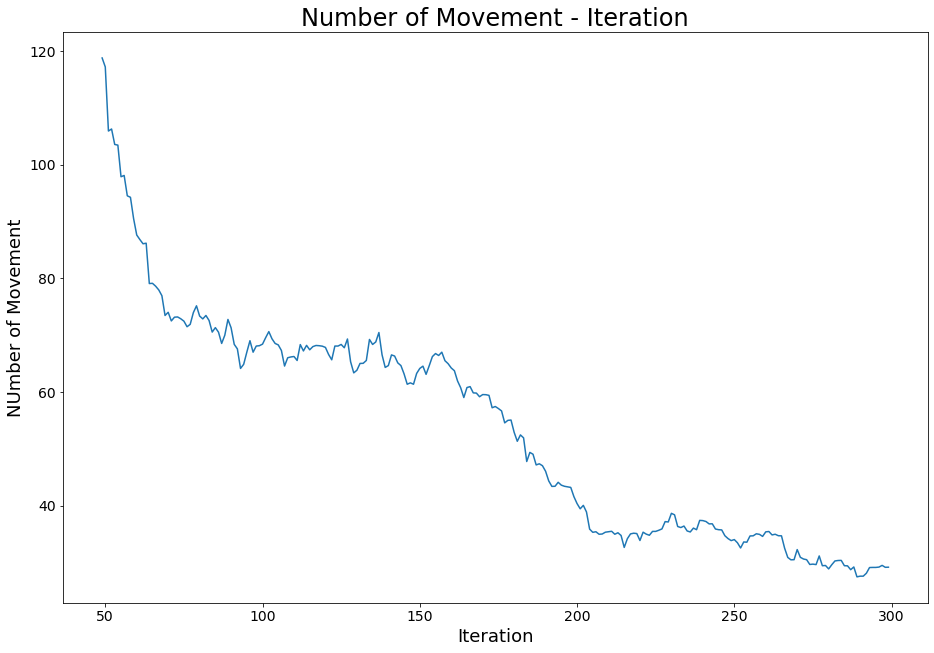

In [176]:
np.random.seed(10)
V,policy=SARSA(LAMBDA=0.95,n_episodes=300)

In [177]:
V

{(0, 0, 0, 0): 0,
 (0, 0, 0, 1): 0,
 (0, 0, 0, 2): 0,
 (0, 0, 0, 3): 0,
 (0, 0, 0, 4): 0,
 (0, 0, 1, 0): 0,
 (0, 0, 1, 1): 0,
 (0, 0, 1, 2): 0,
 (0, 0, 1, 3): 0,
 (0, 0, 1, 4): 0,
 (0, 0, 2, 0): 0,
 (0, 0, 2, 1): 0,
 (0, 0, 2, 2): 0,
 (0, 0, 2, 3): 0,
 (0, 0, 2, 4): 0,
 (0, 0, 3, 0): 0,
 (0, 0, 3, 1): 0,
 (0, 0, 3, 2): 0,
 (0, 0, 3, 3): 0,
 (0, 0, 3, 4): 0,
 (0, 0, 4, 0): 0,
 (0, 0, 4, 1): 0,
 (0, 0, 4, 2): 0,
 (0, 0, 4, 3): 0,
 (0, 0, 4, 4): 0,
 (0, 1, 0, 0): 0,
 (0, 1, 0, 1): 0,
 (0, 1, 0, 2): 0,
 (0, 1, 0, 3): 0,
 (0, 1, 0, 4): 0,
 (0, 1, 1, 0): 0,
 (0, 1, 1, 1): 0,
 (0, 1, 1, 2): 0,
 (0, 1, 1, 3): 0,
 (0, 1, 1, 4): 0,
 (0, 1, 2, 0): 0,
 (0, 1, 2, 1): 0,
 (0, 1, 2, 2): 0,
 (0, 1, 2, 3): 0,
 (0, 1, 2, 4): 0,
 (0, 1, 3, 0): 0,
 (0, 1, 3, 1): 0,
 (0, 1, 3, 2): 0,
 (0, 1, 3, 3): 0,
 (0, 1, 3, 4): 0,
 (0, 1, 4, 0): 0,
 (0, 1, 4, 1): 0,
 (0, 1, 4, 2): 0,
 (0, 1, 4, 3): 0,
 (0, 1, 4, 4): 0,
 (0, 2, 0, 0): 0,
 (0, 2, 0, 1): 0,
 (0, 2, 0, 2): 0,
 (0, 2, 0, 3): 0,
 (0, 2, 0, 4): 0,
 (0, 2, 1,

In [178]:
policy

{(0, 0, 0, 0): 'DU',
 (0, 0, 0, 1): 'UU',
 (0, 0, 0, 2): 'DU',
 (0, 0, 0, 3): 'ZD',
 (0, 0, 0, 4): 'ZU',
 (0, 0, 1, 0): 'UU',
 (0, 0, 1, 1): 'DD',
 (0, 0, 1, 2): 'UD',
 (0, 0, 1, 3): 'UD',
 (0, 0, 1, 4): 'UU',
 (0, 0, 2, 0): 'DU',
 (0, 0, 2, 1): 'ZU',
 (0, 0, 2, 2): 'UZ',
 (0, 0, 2, 3): 'ZZ',
 (0, 0, 2, 4): 'ZD',
 (0, 0, 3, 0): 'DU',
 (0, 0, 3, 1): 'ZZ',
 (0, 0, 3, 2): 'UU',
 (0, 0, 3, 3): 'ZD',
 (0, 0, 3, 4): 'DD',
 (0, 0, 4, 0): 'ZU',
 (0, 0, 4, 1): 'DU',
 (0, 0, 4, 2): 'ZU',
 (0, 0, 4, 3): 'UD',
 (0, 0, 4, 4): 'DD',
 (0, 1, 0, 0): 'UZ',
 (0, 1, 0, 1): 'UZ',
 (0, 1, 0, 2): 'DD',
 (0, 1, 0, 3): 'UU',
 (0, 1, 0, 4): 'UD',
 (0, 1, 1, 0): 'UZ',
 (0, 1, 1, 1): 'DZ',
 (0, 1, 1, 2): 'ZZ',
 (0, 1, 1, 3): 'ZZ',
 (0, 1, 1, 4): 'UU',
 (0, 1, 2, 0): 'ZZ',
 (0, 1, 2, 1): 'UU',
 (0, 1, 2, 2): 'ZZ',
 (0, 1, 2, 3): 'DU',
 (0, 1, 2, 4): 'DU',
 (0, 1, 3, 0): 'UZ',
 (0, 1, 3, 1): 'UZ',
 (0, 1, 3, 2): 'ZZ',
 (0, 1, 3, 3): 'UD',
 (0, 1, 3, 4): 'ZZ',
 (0, 1, 4, 0): 'UZ',
 (0, 1, 4, 1): 'ZU',
 (0, 1, 4, 2)

### Lambda = 0

0 ######################################################################################


1 ######################################################################################


2 ######################################################################################


3 ######################################################################################


4 ######################################################################################


5 ######################################################################################


6 ######################################################################################


7 ######################################################################################


8 ######################################################################################


9 ######################################################################################


10 ######################################################################################


90 ######################################################################################


91 ######################################################################################


92 ######################################################################################


93 ######################################################################################


94 ######################################################################################


95 ######################################################################################


96 ######################################################################################


97 ######################################################################################


98 ######################################################################################


99 ######################################################################################


100 ############################################################################

179 ######################################################################################


180 ######################################################################################


181 ######################################################################################


182 ######################################################################################


183 ######################################################################################


184 ######################################################################################


185 ######################################################################################


186 ######################################################################################


187 ######################################################################################


188 ######################################################################################


189 ##################################################################

268 ######################################################################################


269 ######################################################################################


270 ######################################################################################


271 ######################################################################################


272 ######################################################################################


273 ######################################################################################


274 ######################################################################################


275 ######################################################################################


276 ######################################################################################


277 ######################################################################################


278 ##################################################################

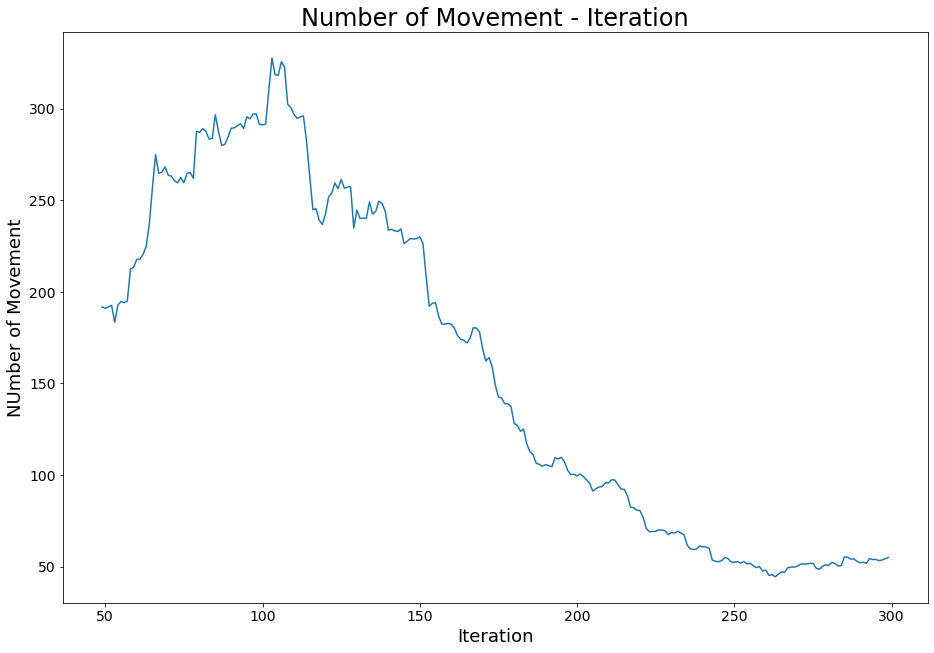

In [85]:
np.random.seed(10)
V,policy=SARSA(LAMBDA=0 ,n_episodes=300)

In [86]:
policy

{(0, 0, 0, 0): 'ZD',
 (0, 0, 0, 1): 'UD',
 (0, 0, 0, 2): 'UU',
 (0, 0, 0, 3): 'ZD',
 (0, 0, 0, 4): 'DD',
 (0, 0, 1, 0): 'UZ',
 (0, 0, 1, 1): 'DU',
 (0, 0, 1, 2): 'UZ',
 (0, 0, 1, 3): 'ZZ',
 (0, 0, 1, 4): 'DD',
 (0, 0, 2, 0): 'DZ',
 (0, 0, 2, 1): 'UU',
 (0, 0, 2, 2): 'ZZ',
 (0, 0, 2, 3): 'UD',
 (0, 0, 2, 4): 'DD',
 (0, 0, 3, 0): 'DD',
 (0, 0, 3, 1): 'UZ',
 (0, 0, 3, 2): 'UZ',
 (0, 0, 3, 3): 'DU',
 (0, 0, 3, 4): 'UZ',
 (0, 0, 4, 0): 'UD',
 (0, 0, 4, 1): 'ZZ',
 (0, 0, 4, 2): 'ZZ',
 (0, 0, 4, 3): 'DZ',
 (0, 0, 4, 4): 'UU',
 (0, 1, 0, 0): 'UD',
 (0, 1, 0, 1): 'DU',
 (0, 1, 0, 2): 'DZ',
 (0, 1, 0, 3): 'ZD',
 (0, 1, 0, 4): 'UD',
 (0, 1, 1, 0): 'DZ',
 (0, 1, 1, 1): 'UD',
 (0, 1, 1, 2): 'ZZ',
 (0, 1, 1, 3): 'ZZ',
 (0, 1, 1, 4): 'ZU',
 (0, 1, 2, 0): 'UD',
 (0, 1, 2, 1): 'DD',
 (0, 1, 2, 2): 'UU',
 (0, 1, 2, 3): 'UU',
 (0, 1, 2, 4): 'DZ',
 (0, 1, 3, 0): 'UD',
 (0, 1, 3, 1): 'ZZ',
 (0, 1, 3, 2): 'UD',
 (0, 1, 3, 3): 'ZU',
 (0, 1, 3, 4): 'UZ',
 (0, 1, 4, 0): 'DZ',
 (0, 1, 4, 1): 'ZZ',
 (0, 1, 4, 2)

In [87]:
V

{(0, 0, 0, 0): 0,
 (0, 0, 0, 1): 0,
 (0, 0, 0, 2): 0,
 (0, 0, 0, 3): 0,
 (0, 0, 0, 4): 0,
 (0, 0, 1, 0): 0,
 (0, 0, 1, 1): 0,
 (0, 0, 1, 2): 0,
 (0, 0, 1, 3): 0,
 (0, 0, 1, 4): 0,
 (0, 0, 2, 0): 0,
 (0, 0, 2, 1): 0,
 (0, 0, 2, 2): 0,
 (0, 0, 2, 3): 0,
 (0, 0, 2, 4): 0,
 (0, 0, 3, 0): 0,
 (0, 0, 3, 1): 0,
 (0, 0, 3, 2): 0,
 (0, 0, 3, 3): 0,
 (0, 0, 3, 4): 0,
 (0, 0, 4, 0): 0,
 (0, 0, 4, 1): 0,
 (0, 0, 4, 2): 0,
 (0, 0, 4, 3): 0,
 (0, 0, 4, 4): 0,
 (0, 1, 0, 0): 0,
 (0, 1, 0, 1): 0,
 (0, 1, 0, 2): 0,
 (0, 1, 0, 3): 0,
 (0, 1, 0, 4): 0,
 (0, 1, 1, 0): 0,
 (0, 1, 1, 1): 0,
 (0, 1, 1, 2): 0,
 (0, 1, 1, 3): 0,
 (0, 1, 1, 4): 0,
 (0, 1, 2, 0): 0,
 (0, 1, 2, 1): 0,
 (0, 1, 2, 2): 0,
 (0, 1, 2, 3): 0,
 (0, 1, 2, 4): 0,
 (0, 1, 3, 0): 0,
 (0, 1, 3, 1): 0,
 (0, 1, 3, 2): 0,
 (0, 1, 3, 3): 0,
 (0, 1, 3, 4): 0,
 (0, 1, 4, 0): 0,
 (0, 1, 4, 1): 0,
 (0, 1, 4, 2): 0,
 (0, 1, 4, 3): 0,
 (0, 1, 4, 4): 0,
 (0, 2, 0, 0): 0,
 (0, 2, 0, 1): 0,
 (0, 2, 0, 2): 0,
 (0, 2, 0, 3): 0,
 (0, 2, 0, 4): 0,
 (0, 2, 1,

#### *Note:* 
In the above, lambda was decrease (1 - 0.95 - 0 ), while the number of iteration fix (300 episode ). Although all of them was converged end of the 300 episodes, if the lambda is near 1, results are better.

### Change Gamma & Alpha

In [103]:
def get_rewards(state):
    if is_wall(state) == True:
        return -5
    elif is_terminal(state) == True:
        return 10
    else:
        return -1

In [104]:
def get_next_state(s, a):
    # this answers: where would I end up if I perform action 'a' in state 's'?
    i, j, v_up, v_right = s[0], s[1], s[2], s[3]
    # if this action moves you somewhere else, then it will be in this dictionary
    if is_wall(s) == False:
        if a in np.array(actions[actions.states == (i,j,v_up,v_right)].action ) :
            if  (a == 'DD') :
                v_up -= 1
                v_right -= 1  
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'DZ') :
                v_up -= 1
                v_right -= 0
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'DU') :
                v_up -= 1
                v_right += 1
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif  (a == 'ZD') :
                v_up -= 0
                v_right -= 1 
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>=course.shape[1]:
                    j = course.shape[1]-1

            elif  (a == 'ZZ') :
                v_up -= 0
                v_right -= 0
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'ZU') :
                v_up -= 0
                v_right += 1
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'UD'):
                v_up += 1
                v_right -= 1
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>=course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'UZ') :
                v_up += 1
                v_right -= 0
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'UU') :
                v_up += 1
                v_right += 1                
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>=course.shape[1]:
                    j = course.shape[1]-1
    else:
        pass

    return i, j, v_up, v_right

In [105]:
transition_probs = {}
rewards = {}
for s in states:
    if (not is_terminal(s)) & (not is_wall(s)) :
        for a in ACTION_SPACE:
            s2 = get_next_state(s, a)
            transition_probs[(s, a, s2)] = 1
            rewards[(s, a, s2)] = get_rewards((s2[0],s2[1]))

In [106]:
def max_dict(d):
    # returns the argmax (key) and max (value) from a dictionary
    # put this into a function since we are using it so often

    # find max val
    max_val = max(d.values())

    # find keys corresponding to max val
    max_keys = [key for key, val in d.items() if val == max_val]
    #print(max_keys,max_val)
    return np.random.choice(max_keys), max_val

#### Gamma = 0.7 & Alpha = 0.4  & epsilon = 0.1

In [107]:
def epsilon_greedy(Q, s, eps=0.1):
    if np.random.random() < eps:
        return np.random.choice(ACTION_SPACE)
    else:
        a_opt = max_dict(Q[s])[0]
        #print(a_opt)
    return a_opt

In [108]:
def SARSA(LAMBDA,n_episodes):
    GAMMA = 0.7
    ALPHA = 0.4
    total_movement=[]
    # initialize Q(s,a) and eligibility traces
    Q = {}
    E={}
    for s in states:
        Q[s] = {}
        E[s]={}
        for a in ACTION_SPACE:
            Q[s][a] = 0

    for it in range(n_episodes):
        print(it,'######################################################################################\n\n')
        movement=0
        for s in states:
            for a in ACTION_SPACE:
                E[s][a] = 0
        s= random_initial_state()
        a = epsilon_greedy(Q, s, eps=0.1)
        visited_state_action={}
        while ( is_terminal(s) == False ):
            if (s,a) not in visited_state_action.keys():
                visited_state_action[(s,a)]=[]
            s2 = get_next_state(s, a)
            r = rewards.get((s, a, s2))
            a2 = epsilon_greedy(Q, s2, eps=0.1)
            delta=r + GAMMA*Q[s2][a2] - Q[s][a]
            E[s][a]=E[s][a]+1
            for (s,a) in visited_state_action.keys():
#            for s in States:
#                for a in ACTION_SPACE:
                    Q[s][a] = Q[s][a] + ALPHA*delta*E[s][a]
                    E[s][a] = E[s][a]*GAMMA*LAMBDA
            #print(s)
            #print(s2)
            if (is_wall(s2) != 1):
            # next state becomes current state
                s = s2
                a = a2
                #print(s)
                movement +=1
            else :
                s = random_initial_state()
                a = epsilon_greedy(Q, s, eps=0.1)
                #print('crash the wall:',s)
                movement +=1
        total_movement.append(movement)
        df_total_movement = pd.DataFrame(total_movement)
        rol_total_movement = df_total_movement.rolling(50).mean()
    plt.rcParams["figure.figsize"] = [15.50, 10.50]
    plt.plot(rol_total_movement)
    plt.title('Number of Movement - Iteration', fontsize=24)
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('NUmber of Movement', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    policy = {}
    V = {}
    for s in states:
        a, max_q = max_dict(Q[s])
        policy[s]= a
        V[s] = max_q
    return V,policy

0 ######################################################################################


1 ######################################################################################


2 ######################################################################################


3 ######################################################################################


4 ######################################################################################


5 ######################################################################################


6 ######################################################################################


7 ######################################################################################


8 ######################################################################################


9 ######################################################################################


10 ######################################################################################


90 ######################################################################################


91 ######################################################################################


92 ######################################################################################


93 ######################################################################################


94 ######################################################################################


95 ######################################################################################


96 ######################################################################################


97 ######################################################################################


98 ######################################################################################


99 ######################################################################################


100 ############################################################################

179 ######################################################################################


180 ######################################################################################


181 ######################################################################################


182 ######################################################################################


183 ######################################################################################


184 ######################################################################################


185 ######################################################################################


186 ######################################################################################


187 ######################################################################################


188 ######################################################################################


189 ##################################################################

268 ######################################################################################


269 ######################################################################################


270 ######################################################################################


271 ######################################################################################


272 ######################################################################################


273 ######################################################################################


274 ######################################################################################


275 ######################################################################################


276 ######################################################################################


277 ######################################################################################


278 ##################################################################

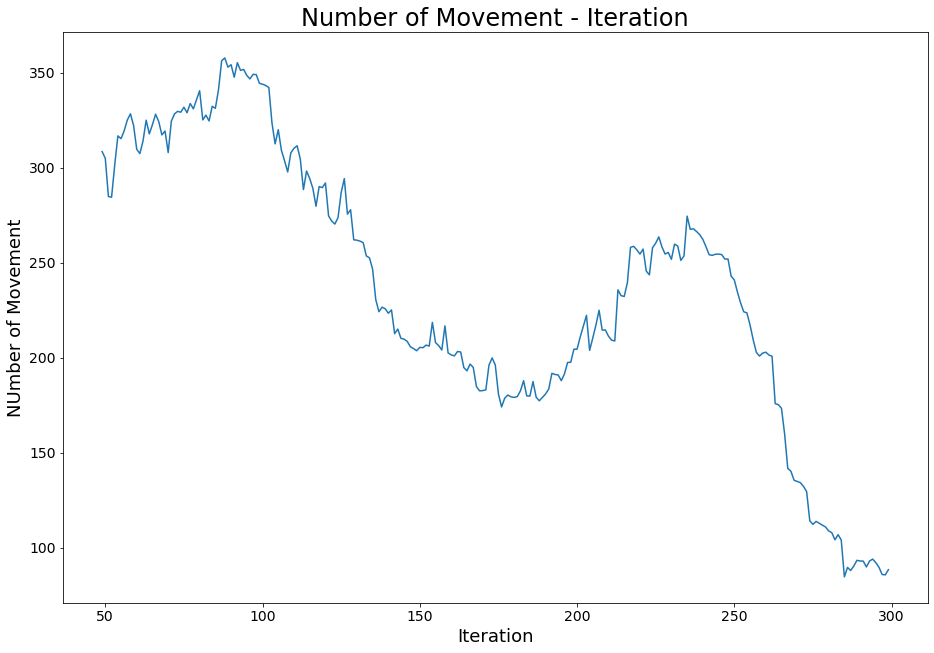

In [109]:
np.random.seed(10)
V,policy=SARSA(LAMBDA=1 ,n_episodes=300)

#### Gamma = 0.7 & Alpha = 0.4  & epsilon = 0.05

In [135]:
def epsilon_greedy(Q, s, eps=0.05):
    if np.random.random() < eps:
        return np.random.choice(ACTION_SPACE)
    else:
        a_opt = max_dict(Q[s])[0]
        #print(a_opt)
    return a_opt

In [136]:
def SARSA(LAMBDA,n_episodes):
    GAMMA = 0.7
    ALPHA = 0.4
    total_movement=[]
    # initialize Q(s,a) and eligibility traces
    Q = {}
    E={}
    for s in states:
        Q[s] = {}
        E[s]={}
        for a in ACTION_SPACE:
            Q[s][a] = 0

    for it in range(n_episodes):
        print(it,'######################################################################################\n\n')
        movement=0
        for s in states:
            for a in ACTION_SPACE:
                E[s][a] = 0
        s= random_initial_state()
        a = epsilon_greedy(Q, s)
        visited_state_action={}
        while ( is_terminal(s) == False ):
            if (s,a) not in visited_state_action.keys():
                visited_state_action[(s,a)]=[]
            s2 = get_next_state(s, a)
            r = rewards.get((s, a, s2))
            a2 = epsilon_greedy(Q, s2)
            delta=r + GAMMA*Q[s2][a2] - Q[s][a]
            E[s][a]=E[s][a]+1
            for (s,a) in visited_state_action.keys():
#            for s in States:
#                for a in ACTION_SPACE:
                    Q[s][a] = Q[s][a] + ALPHA*delta*E[s][a]
                    E[s][a] = E[s][a]*GAMMA*LAMBDA
            #print(s)
            #print(s2)
            if (is_wall(s2) != 1):
            # next state becomes current state
                s = s2
                a = a2
                #print(s)
                movement +=1
            else :
                s = random_initial_state()
                a = epsilon_greedy(Q, s)
                #print('crash the wall:',s)
                movement +=1
        total_movement.append(movement)
        df_total_movement = pd.DataFrame(total_movement)
        rol_total_movement = df_total_movement.rolling(50).mean()
    plt.rcParams["figure.figsize"] = [15.50, 10.50]
    plt.plot(rol_total_movement)
    plt.title('Number of Movement - Iteration', fontsize=24)
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('NUmber of Movement', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    policy = {}
    V = {}
    for s in states:
        a, max_q = max_dict(Q[s])
        policy[s]= a
        V[s] = max_q
    return V,policy

0 ######################################################################################


1 ######################################################################################


2 ######################################################################################


3 ######################################################################################


4 ######################################################################################


5 ######################################################################################


6 ######################################################################################


7 ######################################################################################


8 ######################################################################################


9 ######################################################################################


10 ######################################################################################


90 ######################################################################################


91 ######################################################################################


92 ######################################################################################


93 ######################################################################################


94 ######################################################################################


95 ######################################################################################


96 ######################################################################################


97 ######################################################################################


98 ######################################################################################


99 ######################################################################################


100 ############################################################################

179 ######################################################################################


180 ######################################################################################


181 ######################################################################################


182 ######################################################################################


183 ######################################################################################


184 ######################################################################################


185 ######################################################################################


186 ######################################################################################


187 ######################################################################################


188 ######################################################################################


189 ##################################################################

268 ######################################################################################


269 ######################################################################################


270 ######################################################################################


271 ######################################################################################


272 ######################################################################################


273 ######################################################################################


274 ######################################################################################


275 ######################################################################################


276 ######################################################################################


277 ######################################################################################


278 ##################################################################

357 ######################################################################################


358 ######################################################################################


359 ######################################################################################


360 ######################################################################################


361 ######################################################################################


362 ######################################################################################


363 ######################################################################################


364 ######################################################################################


365 ######################################################################################


366 ######################################################################################


367 ##################################################################

446 ######################################################################################


447 ######################################################################################


448 ######################################################################################


449 ######################################################################################


450 ######################################################################################


451 ######################################################################################


452 ######################################################################################


453 ######################################################################################


454 ######################################################################################


455 ######################################################################################


456 ##################################################################

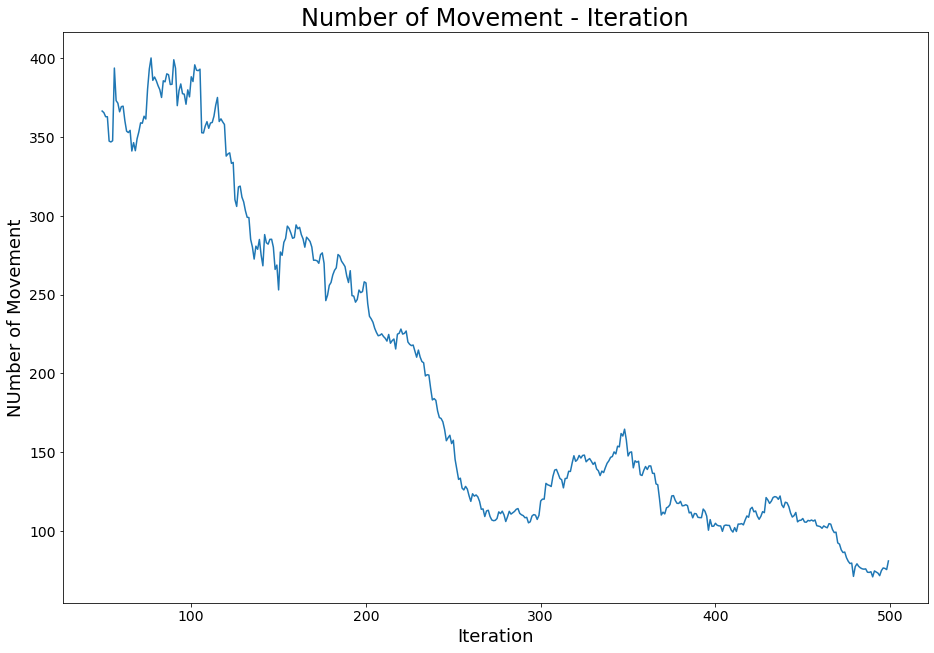

In [137]:
np.random.seed(10)
V,policy=SARSA(LAMBDA=1 ,n_episodes=500)

#### Gamma = 0.8 & Alpha = 0.2  & epsilon = 0.05

In [138]:
def epsilon_greedy(Q, s, eps=0.05):
    if np.random.random() < eps:
        return np.random.choice(ACTION_SPACE)
    else:
        a_opt = max_dict(Q[s])[0]
        #print(a_opt)
    return a_opt

In [139]:
def SARSA(LAMBDA,n_episodes):
    GAMMA = 0.8
    ALPHA = 0.2
    total_movement=[]
    # initialize Q(s,a) and eligibility traces
    Q = {}
    E={}
    for s in states:
        Q[s] = {}
        E[s]={}
        for a in ACTION_SPACE:
            Q[s][a] = 0

    for it in range(n_episodes):
        print(it,'######################################################################################\n\n')
        movement=0
        for s in states:
            for a in ACTION_SPACE:
                E[s][a] = 0
        s= random_initial_state()
        a = epsilon_greedy(Q, s)
        visited_state_action={}
        while ( is_terminal(s) == False ):
            if (s,a) not in visited_state_action.keys():
                visited_state_action[(s,a)]=[]
            s2 = get_next_state(s, a)
            r = rewards.get((s, a, s2))
            a2 = epsilon_greedy(Q, s2)
            delta=r + GAMMA*Q[s2][a2] - Q[s][a]
            E[s][a]=E[s][a]+1
            for (s,a) in visited_state_action.keys():
#            for s in States:
#                for a in ACTION_SPACE:
                    Q[s][a] = Q[s][a] + ALPHA*delta*E[s][a]
                    E[s][a] = E[s][a]*GAMMA*LAMBDA
            #print(s)
            #print(s2)
            if (is_wall(s2) != 1):
            # next state becomes current state
                s = s2
                a = a2
                #print(s)
                movement +=1
            else :
                s = random_initial_state()
                a = epsilon_greedy(Q, s)
                #print('crash the wall:',s)
                movement +=1
        total_movement.append(movement)
        df_total_movement = pd.DataFrame(total_movement)
        rol_total_movement = df_total_movement.rolling(50).mean()
    plt.rcParams["figure.figsize"] = [15.50, 10.50]
    plt.plot(rol_total_movement)
    plt.title('Number of Movement - Iteration', fontsize=24)
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('NUmber of Movement', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    policy = {}
    V = {}
    for s in states:
        a, max_q = max_dict(Q[s])
        policy[s]= a
        V[s] = max_q
    return V,policy

0 ######################################################################################


1 ######################################################################################


2 ######################################################################################


3 ######################################################################################


4 ######################################################################################


5 ######################################################################################


6 ######################################################################################


7 ######################################################################################


8 ######################################################################################


9 ######################################################################################


10 ######################################################################################


90 ######################################################################################


91 ######################################################################################


92 ######################################################################################


93 ######################################################################################


94 ######################################################################################


95 ######################################################################################


96 ######################################################################################


97 ######################################################################################


98 ######################################################################################


99 ######################################################################################


100 ############################################################################

179 ######################################################################################


180 ######################################################################################


181 ######################################################################################


182 ######################################################################################


183 ######################################################################################


184 ######################################################################################


185 ######################################################################################


186 ######################################################################################


187 ######################################################################################


188 ######################################################################################


189 ##################################################################

268 ######################################################################################


269 ######################################################################################


270 ######################################################################################


271 ######################################################################################


272 ######################################################################################


273 ######################################################################################


274 ######################################################################################


275 ######################################################################################


276 ######################################################################################


277 ######################################################################################


278 ##################################################################

357 ######################################################################################


358 ######################################################################################


359 ######################################################################################


360 ######################################################################################


361 ######################################################################################


362 ######################################################################################


363 ######################################################################################


364 ######################################################################################


365 ######################################################################################


366 ######################################################################################


367 ##################################################################

446 ######################################################################################


447 ######################################################################################


448 ######################################################################################


449 ######################################################################################


450 ######################################################################################


451 ######################################################################################


452 ######################################################################################


453 ######################################################################################


454 ######################################################################################


455 ######################################################################################


456 ##################################################################

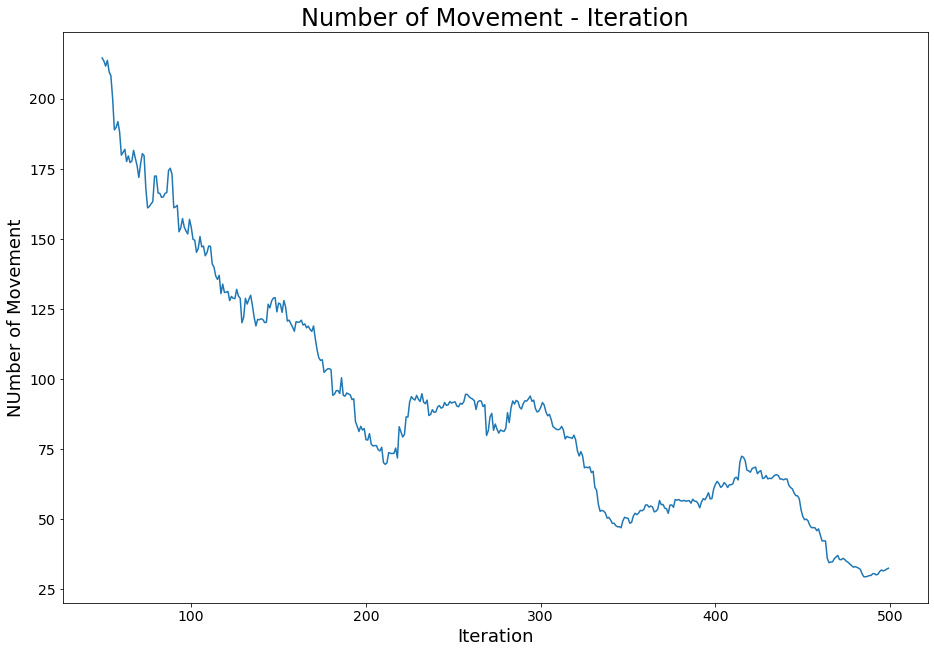

In [140]:
np.random.seed(10)
V,policy=SARSA(LAMBDA=1 ,n_episodes=500)

#### Dynamic epsilon

In [141]:
def epsilon_greedy(Q, s,it):
    if it < 100:
        eps = 0.05
        if np.random.random() < eps:
            return np.random.choice(ACTION_SPACE)
        else:
            a_opt = max_dict(Q[s])[0]

        return a_opt
    
    elif (it < 200) &  (it >= 100):
        eps = 0.08
        if np.random.random() < eps:
            return np.random.choice(ACTION_SPACE)
        else:
            a_opt = max_dict(Q[s])[0]

        return a_opt
    
    elif  (it >= 200):
        eps = 0.1
        if np.random.random() < eps:
            return np.random.choice(ACTION_SPACE)
        else:
            a_opt = max_dict(Q[s])[0]

        return a_opt

In [142]:
def SARSA(LAMBDA,n_episodes):
    GAMMA = 0.7
    ALPHA = 0.4
    total_movement=[]
    # initialize Q(s,a) and eligibility traces
    Q = {}
    E={}
    for s in states:
        Q[s] = {}
        E[s]={}
        for a in ACTION_SPACE:
            Q[s][a] = 0

    for it in range(n_episodes):
        print(it,'######################################################################################\n\n')
        movement=0
        for s in states:
            for a in ACTION_SPACE:
                E[s][a] = 0
        s= random_initial_state()
        a = epsilon_greedy(Q, s,it)
        visited_state_action={}
        while ( is_terminal(s) == False ):
            if (s,a) not in visited_state_action.keys():
                visited_state_action[(s,a)]=[]
            s2 = get_next_state(s, a)
            r = rewards.get((s, a, s2))
            a2 = epsilon_greedy(Q, s2,it)
            delta=r + GAMMA*Q[s2][a2] - Q[s][a]
            E[s][a]=E[s][a]+1
            for (s,a) in visited_state_action.keys():
#            for s in States:
#                for a in ACTION_SPACE:
                    Q[s][a] = Q[s][a] + ALPHA*delta*E[s][a]
                    E[s][a] = E[s][a]*GAMMA*LAMBDA
            #print(s)
            #print(s2)
            if (is_wall(s2) != 1):
            # next state becomes current state
                s = s2
                a = a2
                #print(s)
                movement +=1
            else :
                s = random_initial_state()
                a = epsilon_greedy(Q, s,it)
                #print('crash the wall:',s)
                movement +=1
        total_movement.append(movement)
        df_total_movement = pd.DataFrame(total_movement)
        rol_total_movement = df_total_movement.rolling(50).mean()
    plt.rcParams["figure.figsize"] = [15.50, 10.50]
    plt.plot(rol_total_movement)
    plt.title('Number of Movement - Iteration', fontsize=24)
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('NUmber of Movement', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    policy = {}
    V = {}
    for s in states:
        a, max_q = max_dict(Q[s])
        policy[s]= a
        V[s] = max_q
    return V,policy

0 ######################################################################################


1 ######################################################################################


2 ######################################################################################


3 ######################################################################################


4 ######################################################################################


5 ######################################################################################


6 ######################################################################################


7 ######################################################################################


8 ######################################################################################


9 ######################################################################################


10 ######################################################################################


90 ######################################################################################


91 ######################################################################################


92 ######################################################################################


93 ######################################################################################


94 ######################################################################################


95 ######################################################################################


96 ######################################################################################


97 ######################################################################################


98 ######################################################################################


99 ######################################################################################


100 ############################################################################

179 ######################################################################################


180 ######################################################################################


181 ######################################################################################


182 ######################################################################################


183 ######################################################################################


184 ######################################################################################


185 ######################################################################################


186 ######################################################################################


187 ######################################################################################


188 ######################################################################################


189 ##################################################################

268 ######################################################################################


269 ######################################################################################


270 ######################################################################################


271 ######################################################################################


272 ######################################################################################


273 ######################################################################################


274 ######################################################################################


275 ######################################################################################


276 ######################################################################################


277 ######################################################################################


278 ##################################################################

357 ######################################################################################


358 ######################################################################################


359 ######################################################################################


360 ######################################################################################


361 ######################################################################################


362 ######################################################################################


363 ######################################################################################


364 ######################################################################################


365 ######################################################################################


366 ######################################################################################


367 ##################################################################

446 ######################################################################################


447 ######################################################################################


448 ######################################################################################


449 ######################################################################################


450 ######################################################################################


451 ######################################################################################


452 ######################################################################################


453 ######################################################################################


454 ######################################################################################


455 ######################################################################################


456 ##################################################################

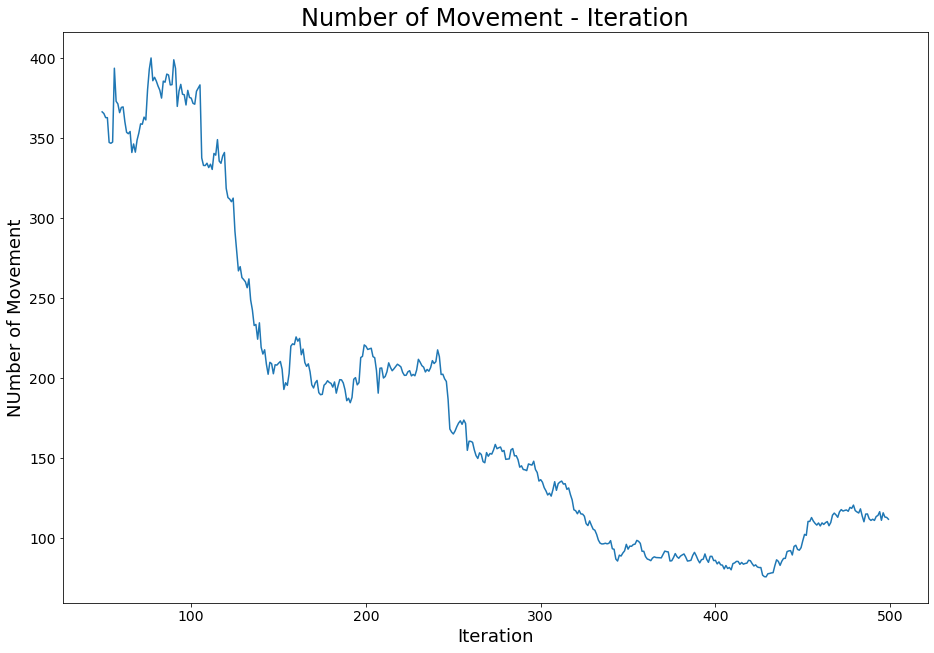

In [144]:
np.random.seed(10)
V,policy=SARSA(LAMBDA=1 ,n_episodes=500)

### Dropping terminal_state rewards

In [145]:
def get_rewards(state):
    if is_wall(state) == True:
        return -5
    else:
        return -1

In [146]:
def get_next_state(s, a):
    # this answers: where would I end up if I perform action 'a' in state 's'?
    i, j, v_up, v_right = s[0], s[1], s[2], s[3]
    # if this action moves you somewhere else, then it will be in this dictionary
    if is_wall(s) == False:
        if a in np.array(actions[actions.states == (i,j,v_up,v_right)].action ) :
            if  (a == 'DD') :
                v_up -= 1
                v_right -= 1  
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'DZ') :
                v_up -= 1
                v_right -= 0
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'DU') :
                v_up -= 1
                v_right += 1
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif  (a == 'ZD') :
                v_up -= 0
                v_right -= 1 
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>=course.shape[1]:
                    j = course.shape[1]-1

            elif  (a == 'ZZ') :
                v_up -= 0
                v_right -= 0
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'ZU') :
                v_up -= 0
                v_right += 1
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'UD'):
                v_up += 1
                v_right -= 1
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>=course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'UZ') :
                v_up += 1
                v_right -= 0
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>= course.shape[1]:
                    j = course.shape[1]-1

            elif (a == 'UU') :
                v_up += 1
                v_right += 1                
                i -= v_up
                j += v_right
                if i<0:
                    i=0
                if j>=course.shape[1]:
                    j = course.shape[1]-1
    else:
        pass

    return i, j, v_up, v_right

In [147]:
transition_probs = {}
rewards = {}
for s in states:
    if (not is_terminal(s)) & (not is_wall(s)) :
        for a in ACTION_SPACE:
            s2 = get_next_state(s, a)
            transition_probs[(s, a, s2)] = 1
            rewards[(s, a, s2)] = get_rewards((s2[0],s2[1]))

In [148]:
def epsilon_greedy(Q, s,it):
    if it < 100:
        eps = 0.05
        if np.random.random() < eps:
            return np.random.choice(ACTION_SPACE)
        else:
            a_opt = max_dict(Q[s])[0]

        return a_opt
    
    elif (it < 200) &  (it >= 100):
        eps = 0.08
        if np.random.random() < eps:
            return np.random.choice(ACTION_SPACE)
        else:
            a_opt = max_dict(Q[s])[0]

        return a_opt
    
    elif  (it >= 200):
        eps = 0.1
        if np.random.random() < eps:
            return np.random.choice(ACTION_SPACE)
        else:
            a_opt = max_dict(Q[s])[0]

        return a_opt

In [149]:
def SARSA(LAMBDA,n_episodes):
    GAMMA = 0.7
    ALPHA = 0.4
    total_movement=[]
    # initialize Q(s,a) and eligibility traces
    Q = {}
    E={}
    for s in states:
        Q[s] = {}
        E[s]={}
        for a in ACTION_SPACE:
            Q[s][a] = 0

    for it in range(n_episodes):
        print(it,'######################################################################################\n\n')
        movement=0
        for s in states:
            for a in ACTION_SPACE:
                E[s][a] = 0
        s= random_initial_state()
        a = epsilon_greedy(Q, s,it)
        visited_state_action={}
        while ( is_terminal(s) == False ):
            if (s,a) not in visited_state_action.keys():
                visited_state_action[(s,a)]=[]
            s2 = get_next_state(s, a)
            r = rewards.get((s, a, s2))
            a2 = epsilon_greedy(Q, s2,it)
            delta=r + GAMMA*Q[s2][a2] - Q[s][a]
            E[s][a]=E[s][a]+1
            for (s,a) in visited_state_action.keys():
#            for s in States:
#                for a in ACTION_SPACE:
                    Q[s][a] = Q[s][a] + ALPHA*delta*E[s][a]
                    E[s][a] = E[s][a]*GAMMA*LAMBDA
            #print(s)
            #print(s2)
            if (is_wall(s2) != 1):
            # next state becomes current state
                s = s2
                a = a2
                #print(s)
                movement +=1
            else :
                s = random_initial_state()
                a = epsilon_greedy(Q, s,it)
                #print('crash the wall:',s)
                movement +=1
        total_movement.append(movement)
        df_total_movement = pd.DataFrame(total_movement)
        rol_total_movement = df_total_movement.rolling(50).mean()
    plt.rcParams["figure.figsize"] = [15.50, 10.50]
    plt.plot(rol_total_movement)
    plt.title('Number of Movement - Iteration', fontsize=24)
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('NUmber of Movement', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    policy = {}
    V = {}
    for s in states:
        a, max_q = max_dict(Q[s])
        policy[s]= a
        V[s] = max_q
    return V,policy

0 ######################################################################################


1 ######################################################################################


2 ######################################################################################


3 ######################################################################################


4 ######################################################################################


5 ######################################################################################


6 ######################################################################################


7 ######################################################################################


8 ######################################################################################


9 ######################################################################################


10 ######################################################################################


90 ######################################################################################


91 ######################################################################################


92 ######################################################################################


93 ######################################################################################


94 ######################################################################################


95 ######################################################################################


96 ######################################################################################


97 ######################################################################################


98 ######################################################################################


99 ######################################################################################


100 ############################################################################

179 ######################################################################################


180 ######################################################################################


181 ######################################################################################


182 ######################################################################################


183 ######################################################################################


184 ######################################################################################


185 ######################################################################################


186 ######################################################################################


187 ######################################################################################


188 ######################################################################################


189 ##################################################################

268 ######################################################################################


269 ######################################################################################


270 ######################################################################################


271 ######################################################################################


272 ######################################################################################


273 ######################################################################################


274 ######################################################################################


275 ######################################################################################


276 ######################################################################################


277 ######################################################################################


278 ##################################################################

357 ######################################################################################


358 ######################################################################################


359 ######################################################################################


360 ######################################################################################


361 ######################################################################################


362 ######################################################################################


363 ######################################################################################


364 ######################################################################################


365 ######################################################################################


366 ######################################################################################


367 ##################################################################

446 ######################################################################################


447 ######################################################################################


448 ######################################################################################


449 ######################################################################################


450 ######################################################################################


451 ######################################################################################


452 ######################################################################################


453 ######################################################################################


454 ######################################################################################


455 ######################################################################################


456 ##################################################################

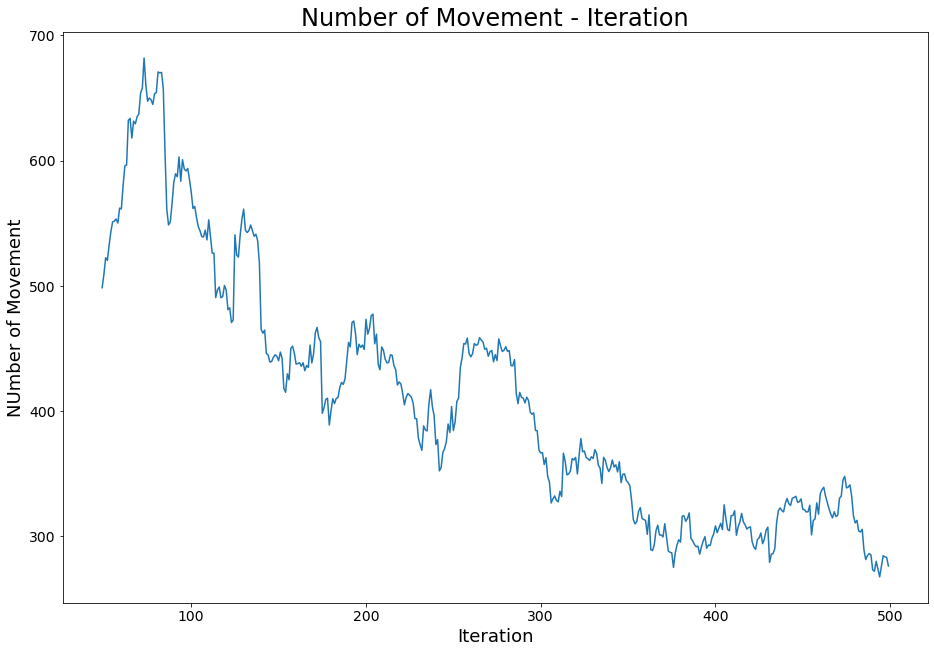

In [150]:
np.random.seed(10)
V,policy=SARSA(LAMBDA=1 ,n_episodes=500)

### Increasing Number of Iteration:

In [179]:
def epsilon_greedy(Q, s,it):
    if it < 500:
        eps = 0.05
        if np.random.random() < eps:
            return np.random.choice(ACTION_SPACE)
        else:
            a_opt = max_dict(Q[s])[0]

        return a_opt
    
    elif (it < 1000) &  (it >= 500):
        eps = 0.08
        if np.random.random() < eps:
            return np.random.choice(ACTION_SPACE)
        else:
            a_opt = max_dict(Q[s])[0]

        return a_opt
    
    elif  (it >= 1000):
        eps = 0.1
        if np.random.random() < eps:
            return np.random.choice(ACTION_SPACE)
        else:
            a_opt = max_dict(Q[s])[0]

        return a_opt

In [180]:
def SARSA(LAMBDA,n_episodes):
    GAMMA = 0.7
    ALPHA = 0.4
    total_movement=[]
    # initialize Q(s,a) and eligibility traces
    Q = {}
    E={}
    for s in states:
        Q[s] = {}
        E[s]={}
        for a in ACTION_SPACE:
            Q[s][a] = 0

    for it in range(n_episodes):
        print(it,'######################################################################################\n\n')
        movement=0
        for s in states:
            for a in ACTION_SPACE:
                E[s][a] = 0
        s= random_initial_state()
        a = epsilon_greedy(Q, s,it)
        visited_state_action={}
        while ( is_terminal(s) == False ):
            if (s,a) not in visited_state_action.keys():
                visited_state_action[(s,a)]=[]
            s2 = get_next_state(s, a)
            r = rewards.get((s, a, s2))
            a2 = epsilon_greedy(Q, s2,it)
            delta=r + GAMMA*Q[s2][a2] - Q[s][a]
            E[s][a]=E[s][a]+1
            for (s,a) in visited_state_action.keys():
#            for s in States:
#                for a in ACTION_SPACE:
                    Q[s][a] = Q[s][a] + ALPHA*delta*E[s][a]
                    E[s][a] = E[s][a]*GAMMA*LAMBDA
            #print(s)
            #print(s2)
            if (is_wall(s2) != 1):
            # next state becomes current state
                s = s2
                a = a2
                #print(s)
                movement +=1
            else :
                s = random_initial_state()
                a = epsilon_greedy(Q, s,it)
                #print('crash the wall:',s)
                movement +=1
        total_movement.append(movement)
        df_total_movement = pd.DataFrame(total_movement)
        rol_total_movement = df_total_movement.rolling(50).mean()
    plt.rcParams["figure.figsize"] = [15.50, 10.50]
    plt.plot(rol_total_movement)
    plt.title('Number of Movement - Iteration', fontsize=24)
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('NUmber of Movement', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    policy = {}
    V = {}
    for s in states:
        a, max_q = max_dict(Q[s])
        policy[s]= a
        V[s] = max_q
    return V,policy

0 ######################################################################################


1 ######################################################################################


2 ######################################################################################


3 ######################################################################################


4 ######################################################################################


5 ######################################################################################


6 ######################################################################################


7 ######################################################################################


8 ######################################################################################


9 ######################################################################################


10 ######################################################################################


90 ######################################################################################


91 ######################################################################################


92 ######################################################################################


93 ######################################################################################


94 ######################################################################################


95 ######################################################################################


96 ######################################################################################


97 ######################################################################################


98 ######################################################################################


99 ######################################################################################


100 ############################################################################

179 ######################################################################################


180 ######################################################################################


181 ######################################################################################


182 ######################################################################################


183 ######################################################################################


184 ######################################################################################


185 ######################################################################################


186 ######################################################################################


187 ######################################################################################


188 ######################################################################################


189 ##################################################################

268 ######################################################################################


269 ######################################################################################


270 ######################################################################################


271 ######################################################################################


272 ######################################################################################


273 ######################################################################################


274 ######################################################################################


275 ######################################################################################


276 ######################################################################################


277 ######################################################################################


278 ##################################################################

357 ######################################################################################


358 ######################################################################################


359 ######################################################################################


360 ######################################################################################


361 ######################################################################################


362 ######################################################################################


363 ######################################################################################


364 ######################################################################################


365 ######################################################################################


366 ######################################################################################


367 ##################################################################

446 ######################################################################################


447 ######################################################################################


448 ######################################################################################


449 ######################################################################################


450 ######################################################################################


451 ######################################################################################


452 ######################################################################################


453 ######################################################################################


454 ######################################################################################


455 ######################################################################################


456 ##################################################################

535 ######################################################################################


536 ######################################################################################


537 ######################################################################################


538 ######################################################################################


539 ######################################################################################


540 ######################################################################################


541 ######################################################################################


542 ######################################################################################


543 ######################################################################################


544 ######################################################################################


545 ##################################################################

624 ######################################################################################


625 ######################################################################################


626 ######################################################################################


627 ######################################################################################


628 ######################################################################################


629 ######################################################################################


630 ######################################################################################


631 ######################################################################################


632 ######################################################################################


633 ######################################################################################


634 ##################################################################

713 ######################################################################################


714 ######################################################################################


715 ######################################################################################


716 ######################################################################################


717 ######################################################################################


718 ######################################################################################


719 ######################################################################################


720 ######################################################################################


721 ######################################################################################


722 ######################################################################################


723 ##################################################################

802 ######################################################################################


803 ######################################################################################


804 ######################################################################################


805 ######################################################################################


806 ######################################################################################


807 ######################################################################################


808 ######################################################################################


809 ######################################################################################


810 ######################################################################################


811 ######################################################################################


812 ##################################################################

891 ######################################################################################


892 ######################################################################################


893 ######################################################################################


894 ######################################################################################


895 ######################################################################################


896 ######################################################################################


897 ######################################################################################


898 ######################################################################################


899 ######################################################################################


900 ######################################################################################


901 ##################################################################

980 ######################################################################################


981 ######################################################################################


982 ######################################################################################


983 ######################################################################################


984 ######################################################################################


985 ######################################################################################


986 ######################################################################################


987 ######################################################################################


988 ######################################################################################


989 ######################################################################################


990 ##################################################################

1068 ######################################################################################


1069 ######################################################################################


1070 ######################################################################################


1071 ######################################################################################


1072 ######################################################################################


1073 ######################################################################################


1074 ######################################################################################


1075 ######################################################################################


1076 ######################################################################################


1077 ######################################################################################


1078 #######################################################

1156 ######################################################################################


1157 ######################################################################################


1158 ######################################################################################


1159 ######################################################################################


1160 ######################################################################################


1161 ######################################################################################


1162 ######################################################################################


1163 ######################################################################################


1164 ######################################################################################


1165 ######################################################################################


1166 #######################################################

1244 ######################################################################################


1245 ######################################################################################


1246 ######################################################################################


1247 ######################################################################################


1248 ######################################################################################


1249 ######################################################################################


1250 ######################################################################################


1251 ######################################################################################


1252 ######################################################################################


1253 ######################################################################################


1254 #######################################################

1332 ######################################################################################


1333 ######################################################################################


1334 ######################################################################################


1335 ######################################################################################


1336 ######################################################################################


1337 ######################################################################################


1338 ######################################################################################


1339 ######################################################################################


1340 ######################################################################################


1341 ######################################################################################


1342 #######################################################

1420 ######################################################################################


1421 ######################################################################################


1422 ######################################################################################


1423 ######################################################################################


1424 ######################################################################################


1425 ######################################################################################


1426 ######################################################################################


1427 ######################################################################################


1428 ######################################################################################


1429 ######################################################################################


1430 #######################################################

1508 ######################################################################################


1509 ######################################################################################


1510 ######################################################################################


1511 ######################################################################################


1512 ######################################################################################


1513 ######################################################################################


1514 ######################################################################################


1515 ######################################################################################


1516 ######################################################################################


1517 ######################################################################################


1518 #######################################################

1596 ######################################################################################


1597 ######################################################################################


1598 ######################################################################################


1599 ######################################################################################


1600 ######################################################################################


1601 ######################################################################################


1602 ######################################################################################


1603 ######################################################################################


1604 ######################################################################################


1605 ######################################################################################


1606 #######################################################

1684 ######################################################################################


1685 ######################################################################################


1686 ######################################################################################


1687 ######################################################################################


1688 ######################################################################################


1689 ######################################################################################


1690 ######################################################################################


1691 ######################################################################################


1692 ######################################################################################


1693 ######################################################################################


1694 #######################################################

1772 ######################################################################################


1773 ######################################################################################


1774 ######################################################################################


1775 ######################################################################################


1776 ######################################################################################


1777 ######################################################################################


1778 ######################################################################################


1779 ######################################################################################


1780 ######################################################################################


1781 ######################################################################################


1782 #######################################################

1860 ######################################################################################


1861 ######################################################################################


1862 ######################################################################################


1863 ######################################################################################


1864 ######################################################################################


1865 ######################################################################################


1866 ######################################################################################


1867 ######################################################################################


1868 ######################################################################################


1869 ######################################################################################


1870 #######################################################

1948 ######################################################################################


1949 ######################################################################################


1950 ######################################################################################


1951 ######################################################################################


1952 ######################################################################################


1953 ######################################################################################


1954 ######################################################################################


1955 ######################################################################################


1956 ######################################################################################


1957 ######################################################################################


1958 #######################################################

2036 ######################################################################################


2037 ######################################################################################


2038 ######################################################################################


2039 ######################################################################################


2040 ######################################################################################


2041 ######################################################################################


2042 ######################################################################################


2043 ######################################################################################


2044 ######################################################################################


2045 ######################################################################################


2046 #######################################################

2124 ######################################################################################


2125 ######################################################################################


2126 ######################################################################################


2127 ######################################################################################


2128 ######################################################################################


2129 ######################################################################################


2130 ######################################################################################


2131 ######################################################################################


2132 ######################################################################################


2133 ######################################################################################


2134 #######################################################

2212 ######################################################################################


2213 ######################################################################################


2214 ######################################################################################


2215 ######################################################################################


2216 ######################################################################################


2217 ######################################################################################


2218 ######################################################################################


2219 ######################################################################################


2220 ######################################################################################


2221 ######################################################################################


2222 #######################################################

2300 ######################################################################################


2301 ######################################################################################


2302 ######################################################################################


2303 ######################################################################################


2304 ######################################################################################


2305 ######################################################################################


2306 ######################################################################################


2307 ######################################################################################


2308 ######################################################################################


2309 ######################################################################################


2310 #######################################################

2388 ######################################################################################


2389 ######################################################################################


2390 ######################################################################################


2391 ######################################################################################


2392 ######################################################################################


2393 ######################################################################################


2394 ######################################################################################


2395 ######################################################################################


2396 ######################################################################################


2397 ######################################################################################


2398 #######################################################

2476 ######################################################################################


2477 ######################################################################################


2478 ######################################################################################


2479 ######################################################################################


2480 ######################################################################################


2481 ######################################################################################


2482 ######################################################################################


2483 ######################################################################################


2484 ######################################################################################


2485 ######################################################################################


2486 #######################################################

2564 ######################################################################################


2565 ######################################################################################


2566 ######################################################################################


2567 ######################################################################################


2568 ######################################################################################


2569 ######################################################################################


2570 ######################################################################################


2571 ######################################################################################


2572 ######################################################################################


2573 ######################################################################################


2574 #######################################################

2652 ######################################################################################


2653 ######################################################################################


2654 ######################################################################################


2655 ######################################################################################


2656 ######################################################################################


2657 ######################################################################################


2658 ######################################################################################


2659 ######################################################################################


2660 ######################################################################################


2661 ######################################################################################


2662 #######################################################

2740 ######################################################################################


2741 ######################################################################################


2742 ######################################################################################


2743 ######################################################################################


2744 ######################################################################################


2745 ######################################################################################


2746 ######################################################################################


2747 ######################################################################################


2748 ######################################################################################


2749 ######################################################################################


2750 #######################################################

2828 ######################################################################################


2829 ######################################################################################


2830 ######################################################################################


2831 ######################################################################################


2832 ######################################################################################


2833 ######################################################################################


2834 ######################################################################################


2835 ######################################################################################


2836 ######################################################################################


2837 ######################################################################################


2838 #######################################################

2916 ######################################################################################


2917 ######################################################################################


2918 ######################################################################################


2919 ######################################################################################


2920 ######################################################################################


2921 ######################################################################################


2922 ######################################################################################


2923 ######################################################################################


2924 ######################################################################################


2925 ######################################################################################


2926 #######################################################

3004 ######################################################################################


3005 ######################################################################################


3006 ######################################################################################


3007 ######################################################################################


3008 ######################################################################################


3009 ######################################################################################


3010 ######################################################################################


3011 ######################################################################################


3012 ######################################################################################


3013 ######################################################################################


3014 #######################################################

3092 ######################################################################################


3093 ######################################################################################


3094 ######################################################################################


3095 ######################################################################################


3096 ######################################################################################


3097 ######################################################################################


3098 ######################################################################################


3099 ######################################################################################


3100 ######################################################################################


3101 ######################################################################################


3102 #######################################################

3180 ######################################################################################


3181 ######################################################################################


3182 ######################################################################################


3183 ######################################################################################


3184 ######################################################################################


3185 ######################################################################################


3186 ######################################################################################


3187 ######################################################################################


3188 ######################################################################################


3189 ######################################################################################


3190 #######################################################

3268 ######################################################################################


3269 ######################################################################################


3270 ######################################################################################


3271 ######################################################################################


3272 ######################################################################################


3273 ######################################################################################


3274 ######################################################################################


3275 ######################################################################################


3276 ######################################################################################


3277 ######################################################################################


3278 #######################################################

3356 ######################################################################################


3357 ######################################################################################


3358 ######################################################################################


3359 ######################################################################################


3360 ######################################################################################


3361 ######################################################################################


3362 ######################################################################################


3363 ######################################################################################


3364 ######################################################################################


3365 ######################################################################################


3366 #######################################################

3444 ######################################################################################


3445 ######################################################################################


3446 ######################################################################################


3447 ######################################################################################


3448 ######################################################################################


3449 ######################################################################################


3450 ######################################################################################


3451 ######################################################################################


3452 ######################################################################################


3453 ######################################################################################


3454 #######################################################

3532 ######################################################################################


3533 ######################################################################################


3534 ######################################################################################


3535 ######################################################################################


3536 ######################################################################################


3537 ######################################################################################


3538 ######################################################################################


3539 ######################################################################################


3540 ######################################################################################


3541 ######################################################################################


3542 #######################################################

3620 ######################################################################################


3621 ######################################################################################


3622 ######################################################################################


3623 ######################################################################################


3624 ######################################################################################


3625 ######################################################################################


3626 ######################################################################################


3627 ######################################################################################


3628 ######################################################################################


3629 ######################################################################################


3630 #######################################################

3708 ######################################################################################


3709 ######################################################################################


3710 ######################################################################################


3711 ######################################################################################


3712 ######################################################################################


3713 ######################################################################################


3714 ######################################################################################


3715 ######################################################################################


3716 ######################################################################################


3717 ######################################################################################


3718 #######################################################

3796 ######################################################################################


3797 ######################################################################################


3798 ######################################################################################


3799 ######################################################################################


3800 ######################################################################################


3801 ######################################################################################


3802 ######################################################################################


3803 ######################################################################################


3804 ######################################################################################


3805 ######################################################################################


3806 #######################################################

3884 ######################################################################################


3885 ######################################################################################


3886 ######################################################################################


3887 ######################################################################################


3888 ######################################################################################


3889 ######################################################################################


3890 ######################################################################################


3891 ######################################################################################


3892 ######################################################################################


3893 ######################################################################################


3894 #######################################################

3972 ######################################################################################


3973 ######################################################################################


3974 ######################################################################################


3975 ######################################################################################


3976 ######################################################################################


3977 ######################################################################################


3978 ######################################################################################


3979 ######################################################################################


3980 ######################################################################################


3981 ######################################################################################


3982 #######################################################

4060 ######################################################################################


4061 ######################################################################################


4062 ######################################################################################


4063 ######################################################################################


4064 ######################################################################################


4065 ######################################################################################


4066 ######################################################################################


4067 ######################################################################################


4068 ######################################################################################


4069 ######################################################################################


4070 #######################################################

4148 ######################################################################################


4149 ######################################################################################


4150 ######################################################################################


4151 ######################################################################################


4152 ######################################################################################


4153 ######################################################################################


4154 ######################################################################################


4155 ######################################################################################


4156 ######################################################################################


4157 ######################################################################################


4158 #######################################################

4236 ######################################################################################


4237 ######################################################################################


4238 ######################################################################################


4239 ######################################################################################


4240 ######################################################################################


4241 ######################################################################################


4242 ######################################################################################


4243 ######################################################################################


4244 ######################################################################################


4245 ######################################################################################


4246 #######################################################

4324 ######################################################################################


4325 ######################################################################################


4326 ######################################################################################


4327 ######################################################################################


4328 ######################################################################################


4329 ######################################################################################


4330 ######################################################################################


4331 ######################################################################################


4332 ######################################################################################


4333 ######################################################################################


4334 #######################################################

4412 ######################################################################################


4413 ######################################################################################


4414 ######################################################################################


4415 ######################################################################################


4416 ######################################################################################


4417 ######################################################################################


4418 ######################################################################################


4419 ######################################################################################


4420 ######################################################################################


4421 ######################################################################################


4422 #######################################################

4500 ######################################################################################


4501 ######################################################################################


4502 ######################################################################################


4503 ######################################################################################


4504 ######################################################################################


4505 ######################################################################################


4506 ######################################################################################


4507 ######################################################################################


4508 ######################################################################################


4509 ######################################################################################


4510 #######################################################

4588 ######################################################################################


4589 ######################################################################################


4590 ######################################################################################


4591 ######################################################################################


4592 ######################################################################################


4593 ######################################################################################


4594 ######################################################################################


4595 ######################################################################################


4596 ######################################################################################


4597 ######################################################################################


4598 #######################################################

4676 ######################################################################################


4677 ######################################################################################


4678 ######################################################################################


4679 ######################################################################################


4680 ######################################################################################


4681 ######################################################################################


4682 ######################################################################################


4683 ######################################################################################


4684 ######################################################################################


4685 ######################################################################################


4686 #######################################################

4764 ######################################################################################


4765 ######################################################################################


4766 ######################################################################################


4767 ######################################################################################


4768 ######################################################################################


4769 ######################################################################################


4770 ######################################################################################


4771 ######################################################################################


4772 ######################################################################################


4773 ######################################################################################


4774 #######################################################

4852 ######################################################################################


4853 ######################################################################################


4854 ######################################################################################


4855 ######################################################################################


4856 ######################################################################################


4857 ######################################################################################


4858 ######################################################################################


4859 ######################################################################################


4860 ######################################################################################


4861 ######################################################################################


4862 #######################################################

4940 ######################################################################################


4941 ######################################################################################


4942 ######################################################################################


4943 ######################################################################################


4944 ######################################################################################


4945 ######################################################################################


4946 ######################################################################################


4947 ######################################################################################


4948 ######################################################################################


4949 ######################################################################################


4950 #######################################################

5028 ######################################################################################


5029 ######################################################################################


5030 ######################################################################################


5031 ######################################################################################


5032 ######################################################################################


5033 ######################################################################################


5034 ######################################################################################


5035 ######################################################################################


5036 ######################################################################################


5037 ######################################################################################


5038 #######################################################

5116 ######################################################################################


5117 ######################################################################################


5118 ######################################################################################


5119 ######################################################################################


5120 ######################################################################################


5121 ######################################################################################


5122 ######################################################################################


5123 ######################################################################################


5124 ######################################################################################


5125 ######################################################################################


5126 #######################################################

5204 ######################################################################################


5205 ######################################################################################


5206 ######################################################################################


5207 ######################################################################################


5208 ######################################################################################


5209 ######################################################################################


5210 ######################################################################################


5211 ######################################################################################


5212 ######################################################################################


5213 ######################################################################################


5214 #######################################################

5292 ######################################################################################


5293 ######################################################################################


5294 ######################################################################################


5295 ######################################################################################


5296 ######################################################################################


5297 ######################################################################################


5298 ######################################################################################


5299 ######################################################################################


5300 ######################################################################################


5301 ######################################################################################


5302 #######################################################

5380 ######################################################################################


5381 ######################################################################################


5382 ######################################################################################


5383 ######################################################################################


5384 ######################################################################################


5385 ######################################################################################


5386 ######################################################################################


5387 ######################################################################################


5388 ######################################################################################


5389 ######################################################################################


5390 #######################################################

5468 ######################################################################################


5469 ######################################################################################


5470 ######################################################################################


5471 ######################################################################################


5472 ######################################################################################


5473 ######################################################################################


5474 ######################################################################################


5475 ######################################################################################


5476 ######################################################################################


5477 ######################################################################################


5478 #######################################################

5556 ######################################################################################


5557 ######################################################################################


5558 ######################################################################################


5559 ######################################################################################


5560 ######################################################################################


5561 ######################################################################################


5562 ######################################################################################


5563 ######################################################################################


5564 ######################################################################################


5565 ######################################################################################


5566 #######################################################

5644 ######################################################################################


5645 ######################################################################################


5646 ######################################################################################


5647 ######################################################################################


5648 ######################################################################################


5649 ######################################################################################


5650 ######################################################################################


5651 ######################################################################################


5652 ######################################################################################


5653 ######################################################################################


5654 #######################################################

5732 ######################################################################################


5733 ######################################################################################


5734 ######################################################################################


5735 ######################################################################################


5736 ######################################################################################


5737 ######################################################################################


5738 ######################################################################################


5739 ######################################################################################


5740 ######################################################################################


5741 ######################################################################################


5742 #######################################################

5820 ######################################################################################


5821 ######################################################################################


5822 ######################################################################################


5823 ######################################################################################


5824 ######################################################################################


5825 ######################################################################################


5826 ######################################################################################


5827 ######################################################################################


5828 ######################################################################################


5829 ######################################################################################


5830 #######################################################

5908 ######################################################################################


5909 ######################################################################################


5910 ######################################################################################


5911 ######################################################################################


5912 ######################################################################################


5913 ######################################################################################


5914 ######################################################################################


5915 ######################################################################################


5916 ######################################################################################


5917 ######################################################################################


5918 #######################################################

5996 ######################################################################################


5997 ######################################################################################


5998 ######################################################################################


5999 ######################################################################################


6000 ######################################################################################


6001 ######################################################################################


6002 ######################################################################################


6003 ######################################################################################


6004 ######################################################################################


6005 ######################################################################################


6006 #######################################################

6084 ######################################################################################


6085 ######################################################################################


6086 ######################################################################################


6087 ######################################################################################


6088 ######################################################################################


6089 ######################################################################################


6090 ######################################################################################


6091 ######################################################################################


6092 ######################################################################################


6093 ######################################################################################


6094 #######################################################

6172 ######################################################################################


6173 ######################################################################################


6174 ######################################################################################


6175 ######################################################################################


6176 ######################################################################################


6177 ######################################################################################


6178 ######################################################################################


6179 ######################################################################################


6180 ######################################################################################


6181 ######################################################################################


6182 #######################################################

6260 ######################################################################################


6261 ######################################################################################


6262 ######################################################################################


6263 ######################################################################################


6264 ######################################################################################


6265 ######################################################################################


6266 ######################################################################################


6267 ######################################################################################


6268 ######################################################################################


6269 ######################################################################################


6270 #######################################################

6348 ######################################################################################


6349 ######################################################################################


6350 ######################################################################################


6351 ######################################################################################


6352 ######################################################################################


6353 ######################################################################################


6354 ######################################################################################


6355 ######################################################################################


6356 ######################################################################################


6357 ######################################################################################


6358 #######################################################

6436 ######################################################################################


6437 ######################################################################################


6438 ######################################################################################


6439 ######################################################################################


6440 ######################################################################################


6441 ######################################################################################


6442 ######################################################################################


6443 ######################################################################################


6444 ######################################################################################


6445 ######################################################################################


6446 #######################################################

6524 ######################################################################################


6525 ######################################################################################


6526 ######################################################################################


6527 ######################################################################################


6528 ######################################################################################


6529 ######################################################################################


6530 ######################################################################################


6531 ######################################################################################


6532 ######################################################################################


6533 ######################################################################################


6534 #######################################################

6612 ######################################################################################


6613 ######################################################################################


6614 ######################################################################################


6615 ######################################################################################


6616 ######################################################################################


6617 ######################################################################################


6618 ######################################################################################


6619 ######################################################################################


6620 ######################################################################################


6621 ######################################################################################


6622 #######################################################

6700 ######################################################################################


6701 ######################################################################################


6702 ######################################################################################


6703 ######################################################################################


6704 ######################################################################################


6705 ######################################################################################


6706 ######################################################################################


6707 ######################################################################################


6708 ######################################################################################


6709 ######################################################################################


6710 #######################################################

6788 ######################################################################################


6789 ######################################################################################


6790 ######################################################################################


6791 ######################################################################################


6792 ######################################################################################


6793 ######################################################################################


6794 ######################################################################################


6795 ######################################################################################


6796 ######################################################################################


6797 ######################################################################################


6798 #######################################################

6876 ######################################################################################


6877 ######################################################################################


6878 ######################################################################################


6879 ######################################################################################


6880 ######################################################################################


6881 ######################################################################################


6882 ######################################################################################


6883 ######################################################################################


6884 ######################################################################################


6885 ######################################################################################


6886 #######################################################

6964 ######################################################################################


6965 ######################################################################################


6966 ######################################################################################


6967 ######################################################################################


6968 ######################################################################################


6969 ######################################################################################


6970 ######################################################################################


6971 ######################################################################################


6972 ######################################################################################


6973 ######################################################################################


6974 #######################################################

7052 ######################################################################################


7053 ######################################################################################


7054 ######################################################################################


7055 ######################################################################################


7056 ######################################################################################


7057 ######################################################################################


7058 ######################################################################################


7059 ######################################################################################


7060 ######################################################################################


7061 ######################################################################################


7062 #######################################################

7140 ######################################################################################


7141 ######################################################################################


7142 ######################################################################################


7143 ######################################################################################


7144 ######################################################################################


7145 ######################################################################################


7146 ######################################################################################


7147 ######################################################################################


7148 ######################################################################################


7149 ######################################################################################


7150 #######################################################

7228 ######################################################################################


7229 ######################################################################################


7230 ######################################################################################


7231 ######################################################################################


7232 ######################################################################################


7233 ######################################################################################


7234 ######################################################################################


7235 ######################################################################################


7236 ######################################################################################


7237 ######################################################################################


7238 #######################################################

7316 ######################################################################################


7317 ######################################################################################


7318 ######################################################################################


7319 ######################################################################################


7320 ######################################################################################


7321 ######################################################################################


7322 ######################################################################################


7323 ######################################################################################


7324 ######################################################################################


7325 ######################################################################################


7326 #######################################################

7404 ######################################################################################


7405 ######################################################################################


7406 ######################################################################################


7407 ######################################################################################


7408 ######################################################################################


7409 ######################################################################################


7410 ######################################################################################


7411 ######################################################################################


7412 ######################################################################################


7413 ######################################################################################


7414 #######################################################

7492 ######################################################################################


7493 ######################################################################################


7494 ######################################################################################


7495 ######################################################################################


7496 ######################################################################################


7497 ######################################################################################


7498 ######################################################################################


7499 ######################################################################################


7500 ######################################################################################


7501 ######################################################################################


7502 #######################################################

7580 ######################################################################################


7581 ######################################################################################


7582 ######################################################################################


7583 ######################################################################################


7584 ######################################################################################


7585 ######################################################################################


7586 ######################################################################################


7587 ######################################################################################


7588 ######################################################################################


7589 ######################################################################################


7590 #######################################################

7668 ######################################################################################


7669 ######################################################################################


7670 ######################################################################################


7671 ######################################################################################


7672 ######################################################################################


7673 ######################################################################################


7674 ######################################################################################


7675 ######################################################################################


7676 ######################################################################################


7677 ######################################################################################


7678 #######################################################

7756 ######################################################################################


7757 ######################################################################################


7758 ######################################################################################


7759 ######################################################################################


7760 ######################################################################################


7761 ######################################################################################


7762 ######################################################################################


7763 ######################################################################################


7764 ######################################################################################


7765 ######################################################################################


7766 #######################################################

7844 ######################################################################################


7845 ######################################################################################


7846 ######################################################################################


7847 ######################################################################################


7848 ######################################################################################


7849 ######################################################################################


7850 ######################################################################################


7851 ######################################################################################


7852 ######################################################################################


7853 ######################################################################################


7854 #######################################################

7932 ######################################################################################


7933 ######################################################################################


7934 ######################################################################################


7935 ######################################################################################


7936 ######################################################################################


7937 ######################################################################################


7938 ######################################################################################


7939 ######################################################################################


7940 ######################################################################################


7941 ######################################################################################


7942 #######################################################

8020 ######################################################################################


8021 ######################################################################################


8022 ######################################################################################


8023 ######################################################################################


8024 ######################################################################################


8025 ######################################################################################


8026 ######################################################################################


8027 ######################################################################################


8028 ######################################################################################


8029 ######################################################################################


8030 #######################################################

8108 ######################################################################################


8109 ######################################################################################


8110 ######################################################################################


8111 ######################################################################################


8112 ######################################################################################


8113 ######################################################################################


8114 ######################################################################################


8115 ######################################################################################


8116 ######################################################################################


8117 ######################################################################################


8118 #######################################################

8196 ######################################################################################


8197 ######################################################################################


8198 ######################################################################################


8199 ######################################################################################


8200 ######################################################################################


8201 ######################################################################################


8202 ######################################################################################


8203 ######################################################################################


8204 ######################################################################################


8205 ######################################################################################


8206 #######################################################

8285 ######################################################################################


8286 ######################################################################################


8287 ######################################################################################


8288 ######################################################################################


8289 ######################################################################################


8290 ######################################################################################


8291 ######################################################################################


8292 ######################################################################################


8293 ######################################################################################


8294 ######################################################################################


8295 #######################################################

8373 ######################################################################################


8374 ######################################################################################


8375 ######################################################################################


8376 ######################################################################################


8377 ######################################################################################


8378 ######################################################################################


8379 ######################################################################################


8380 ######################################################################################


8381 ######################################################################################


8382 ######################################################################################


8383 #######################################################

8461 ######################################################################################


8462 ######################################################################################


8463 ######################################################################################


8464 ######################################################################################


8465 ######################################################################################


8466 ######################################################################################


8467 ######################################################################################


8468 ######################################################################################


8469 ######################################################################################


8470 ######################################################################################


8471 #######################################################

8549 ######################################################################################


8550 ######################################################################################


8551 ######################################################################################


8552 ######################################################################################


8553 ######################################################################################


8554 ######################################################################################


8555 ######################################################################################


8556 ######################################################################################


8557 ######################################################################################


8558 ######################################################################################


8559 #######################################################

8637 ######################################################################################


8638 ######################################################################################


8639 ######################################################################################


8640 ######################################################################################


8641 ######################################################################################


8642 ######################################################################################


8643 ######################################################################################


8644 ######################################################################################


8645 ######################################################################################


8646 ######################################################################################


8647 #######################################################

8725 ######################################################################################


8726 ######################################################################################


8727 ######################################################################################


8728 ######################################################################################


8729 ######################################################################################


8730 ######################################################################################


8731 ######################################################################################


8732 ######################################################################################


8733 ######################################################################################


8734 ######################################################################################


8735 #######################################################

8813 ######################################################################################


8814 ######################################################################################


8815 ######################################################################################


8816 ######################################################################################


8817 ######################################################################################


8818 ######################################################################################


8819 ######################################################################################


8820 ######################################################################################


8821 ######################################################################################


8822 ######################################################################################


8823 #######################################################

8901 ######################################################################################


8902 ######################################################################################


8903 ######################################################################################


8904 ######################################################################################


8905 ######################################################################################


8906 ######################################################################################


8907 ######################################################################################


8908 ######################################################################################


8909 ######################################################################################


8910 ######################################################################################


8911 #######################################################

8989 ######################################################################################


8990 ######################################################################################


8991 ######################################################################################


8992 ######################################################################################


8993 ######################################################################################


8994 ######################################################################################


8995 ######################################################################################


8996 ######################################################################################


8997 ######################################################################################


8998 ######################################################################################


8999 #######################################################

9077 ######################################################################################


9078 ######################################################################################


9079 ######################################################################################


9080 ######################################################################################


9081 ######################################################################################


9082 ######################################################################################


9083 ######################################################################################


9084 ######################################################################################


9085 ######################################################################################


9086 ######################################################################################


9087 #######################################################

9165 ######################################################################################


9166 ######################################################################################


9167 ######################################################################################


9168 ######################################################################################


9169 ######################################################################################


9170 ######################################################################################


9171 ######################################################################################


9172 ######################################################################################


9173 ######################################################################################


9174 ######################################################################################


9175 #######################################################

9253 ######################################################################################


9254 ######################################################################################


9255 ######################################################################################


9256 ######################################################################################


9257 ######################################################################################


9258 ######################################################################################


9259 ######################################################################################


9260 ######################################################################################


9261 ######################################################################################


9262 ######################################################################################


9263 #######################################################

9341 ######################################################################################


9342 ######################################################################################


9343 ######################################################################################


9344 ######################################################################################


9345 ######################################################################################


9346 ######################################################################################


9347 ######################################################################################


9348 ######################################################################################


9349 ######################################################################################


9350 ######################################################################################


9351 #######################################################

9429 ######################################################################################


9430 ######################################################################################


9431 ######################################################################################


9432 ######################################################################################


9433 ######################################################################################


9434 ######################################################################################


9435 ######################################################################################


9436 ######################################################################################


9437 ######################################################################################


9438 ######################################################################################


9439 #######################################################

9517 ######################################################################################


9518 ######################################################################################


9519 ######################################################################################


9520 ######################################################################################


9521 ######################################################################################


9522 ######################################################################################


9523 ######################################################################################


9524 ######################################################################################


9525 ######################################################################################


9526 ######################################################################################


9527 #######################################################

9605 ######################################################################################


9606 ######################################################################################


9607 ######################################################################################


9608 ######################################################################################


9609 ######################################################################################


9610 ######################################################################################


9611 ######################################################################################


9612 ######################################################################################


9613 ######################################################################################


9614 ######################################################################################


9615 #######################################################

9693 ######################################################################################


9694 ######################################################################################


9695 ######################################################################################


9696 ######################################################################################


9697 ######################################################################################


9698 ######################################################################################


9699 ######################################################################################


9700 ######################################################################################


9701 ######################################################################################


9702 ######################################################################################


9703 #######################################################

9781 ######################################################################################


9782 ######################################################################################


9783 ######################################################################################


9784 ######################################################################################


9785 ######################################################################################


9786 ######################################################################################


9787 ######################################################################################


9788 ######################################################################################


9789 ######################################################################################


9790 ######################################################################################


9791 #######################################################

9869 ######################################################################################


9870 ######################################################################################


9871 ######################################################################################


9872 ######################################################################################


9873 ######################################################################################


9874 ######################################################################################


9875 ######################################################################################


9876 ######################################################################################


9877 ######################################################################################


9878 ######################################################################################


9879 #######################################################

9957 ######################################################################################


9958 ######################################################################################


9959 ######################################################################################


9960 ######################################################################################


9961 ######################################################################################


9962 ######################################################################################


9963 ######################################################################################


9964 ######################################################################################


9965 ######################################################################################


9966 ######################################################################################


9967 #######################################################

10044 ######################################################################################


10045 ######################################################################################


10046 ######################################################################################


10047 ######################################################################################


10048 ######################################################################################


10049 ######################################################################################


10050 ######################################################################################


10051 ######################################################################################


10052 ######################################################################################


10053 ######################################################################################


10054 ############################################

10131 ######################################################################################


10132 ######################################################################################


10133 ######################################################################################


10134 ######################################################################################


10135 ######################################################################################


10136 ######################################################################################


10137 ######################################################################################


10138 ######################################################################################


10139 ######################################################################################


10140 ######################################################################################


10141 ############################################

10219 ######################################################################################


10220 ######################################################################################


10221 ######################################################################################


10222 ######################################################################################


10223 ######################################################################################


10224 ######################################################################################


10225 ######################################################################################


10226 ######################################################################################


10227 ######################################################################################


10228 ######################################################################################


10229 ############################################

10306 ######################################################################################


10307 ######################################################################################


10308 ######################################################################################


10309 ######################################################################################


10310 ######################################################################################


10311 ######################################################################################


10312 ######################################################################################


10313 ######################################################################################


10314 ######################################################################################


10315 ######################################################################################


10316 ############################################

10393 ######################################################################################


10394 ######################################################################################


10395 ######################################################################################


10396 ######################################################################################


10397 ######################################################################################


10398 ######################################################################################


10399 ######################################################################################


10400 ######################################################################################


10401 ######################################################################################


10402 ######################################################################################


10403 ############################################

10480 ######################################################################################


10481 ######################################################################################


10482 ######################################################################################


10483 ######################################################################################


10484 ######################################################################################


10485 ######################################################################################


10486 ######################################################################################


10487 ######################################################################################


10488 ######################################################################################


10489 ######################################################################################


10490 ############################################

10567 ######################################################################################


10568 ######################################################################################


10569 ######################################################################################


10570 ######################################################################################


10571 ######################################################################################


10572 ######################################################################################


10573 ######################################################################################


10574 ######################################################################################


10575 ######################################################################################


10576 ######################################################################################


10577 ############################################

10654 ######################################################################################


10655 ######################################################################################


10656 ######################################################################################


10657 ######################################################################################


10658 ######################################################################################


10659 ######################################################################################


10660 ######################################################################################


10661 ######################################################################################


10662 ######################################################################################


10663 ######################################################################################


10664 ############################################

10741 ######################################################################################


10742 ######################################################################################


10743 ######################################################################################


10744 ######################################################################################


10745 ######################################################################################


10746 ######################################################################################


10747 ######################################################################################


10748 ######################################################################################


10749 ######################################################################################


10750 ######################################################################################


10751 ############################################

10828 ######################################################################################


10829 ######################################################################################


10830 ######################################################################################


10831 ######################################################################################


10832 ######################################################################################


10833 ######################################################################################


10834 ######################################################################################


10835 ######################################################################################


10836 ######################################################################################


10837 ######################################################################################


10838 ############################################

10915 ######################################################################################


10916 ######################################################################################


10917 ######################################################################################


10918 ######################################################################################


10919 ######################################################################################


10920 ######################################################################################


10921 ######################################################################################


10922 ######################################################################################


10923 ######################################################################################


10924 ######################################################################################


10925 ############################################

11002 ######################################################################################


11003 ######################################################################################


11004 ######################################################################################


11005 ######################################################################################


11006 ######################################################################################


11007 ######################################################################################


11008 ######################################################################################


11009 ######################################################################################


11010 ######################################################################################


11011 ######################################################################################


11012 ############################################

11089 ######################################################################################


11090 ######################################################################################


11091 ######################################################################################


11092 ######################################################################################


11093 ######################################################################################


11094 ######################################################################################


11095 ######################################################################################


11096 ######################################################################################


11097 ######################################################################################


11098 ######################################################################################


11099 ############################################

11176 ######################################################################################


11177 ######################################################################################


11178 ######################################################################################


11179 ######################################################################################


11180 ######################################################################################


11181 ######################################################################################


11182 ######################################################################################


11183 ######################################################################################


11184 ######################################################################################


11185 ######################################################################################


11186 ############################################

11263 ######################################################################################


11264 ######################################################################################


11265 ######################################################################################


11266 ######################################################################################


11267 ######################################################################################


11268 ######################################################################################


11269 ######################################################################################


11270 ######################################################################################


11271 ######################################################################################


11272 ######################################################################################


11273 ############################################

11350 ######################################################################################


11351 ######################################################################################


11352 ######################################################################################


11353 ######################################################################################


11354 ######################################################################################


11355 ######################################################################################


11356 ######################################################################################


11357 ######################################################################################


11358 ######################################################################################


11359 ######################################################################################


11360 ############################################

11437 ######################################################################################


11438 ######################################################################################


11439 ######################################################################################


11440 ######################################################################################


11441 ######################################################################################


11442 ######################################################################################


11443 ######################################################################################


11444 ######################################################################################


11445 ######################################################################################


11446 ######################################################################################


11447 ############################################

11524 ######################################################################################


11525 ######################################################################################


11526 ######################################################################################


11527 ######################################################################################


11528 ######################################################################################


11529 ######################################################################################


11530 ######################################################################################


11531 ######################################################################################


11532 ######################################################################################


11533 ######################################################################################


11534 ############################################

11611 ######################################################################################


11612 ######################################################################################


11613 ######################################################################################


11614 ######################################################################################


11615 ######################################################################################


11616 ######################################################################################


11617 ######################################################################################


11618 ######################################################################################


11619 ######################################################################################


11620 ######################################################################################


11621 ############################################

11698 ######################################################################################


11699 ######################################################################################


11700 ######################################################################################


11701 ######################################################################################


11702 ######################################################################################


11703 ######################################################################################


11704 ######################################################################################


11705 ######################################################################################


11706 ######################################################################################


11707 ######################################################################################


11708 ############################################

11785 ######################################################################################


11786 ######################################################################################


11787 ######################################################################################


11788 ######################################################################################


11789 ######################################################################################


11790 ######################################################################################


11791 ######################################################################################


11792 ######################################################################################


11793 ######################################################################################


11794 ######################################################################################


11795 ############################################

11872 ######################################################################################


11873 ######################################################################################


11874 ######################################################################################


11875 ######################################################################################


11876 ######################################################################################


11877 ######################################################################################


11878 ######################################################################################


11879 ######################################################################################


11880 ######################################################################################


11881 ######################################################################################


11882 ############################################

11959 ######################################################################################


11960 ######################################################################################


11961 ######################################################################################


11962 ######################################################################################


11963 ######################################################################################


11964 ######################################################################################


11965 ######################################################################################


11966 ######################################################################################


11967 ######################################################################################


11968 ######################################################################################


11969 ############################################

12046 ######################################################################################


12047 ######################################################################################


12048 ######################################################################################


12049 ######################################################################################


12050 ######################################################################################


12051 ######################################################################################


12052 ######################################################################################


12053 ######################################################################################


12054 ######################################################################################


12055 ######################################################################################


12056 ############################################

12133 ######################################################################################


12134 ######################################################################################


12135 ######################################################################################


12136 ######################################################################################


12137 ######################################################################################


12138 ######################################################################################


12139 ######################################################################################


12140 ######################################################################################


12141 ######################################################################################


12142 ######################################################################################


12143 ############################################

12220 ######################################################################################


12221 ######################################################################################


12222 ######################################################################################


12223 ######################################################################################


12224 ######################################################################################


12225 ######################################################################################


12226 ######################################################################################


12227 ######################################################################################


12228 ######################################################################################


12229 ######################################################################################


12230 ############################################

12307 ######################################################################################


12308 ######################################################################################


12309 ######################################################################################


12310 ######################################################################################


12311 ######################################################################################


12312 ######################################################################################


12313 ######################################################################################


12314 ######################################################################################


12315 ######################################################################################


12316 ######################################################################################


12317 ############################################

12394 ######################################################################################


12395 ######################################################################################


12396 ######################################################################################


12397 ######################################################################################


12398 ######################################################################################


12399 ######################################################################################


12400 ######################################################################################


12401 ######################################################################################


12402 ######################################################################################


12403 ######################################################################################


12404 ############################################

12481 ######################################################################################


12482 ######################################################################################


12483 ######################################################################################


12484 ######################################################################################


12485 ######################################################################################


12486 ######################################################################################


12487 ######################################################################################


12488 ######################################################################################


12489 ######################################################################################


12490 ######################################################################################


12491 ############################################

12568 ######################################################################################


12569 ######################################################################################


12570 ######################################################################################


12571 ######################################################################################


12572 ######################################################################################


12573 ######################################################################################


12574 ######################################################################################


12575 ######################################################################################


12576 ######################################################################################


12577 ######################################################################################


12578 ############################################

12656 ######################################################################################


12657 ######################################################################################


12658 ######################################################################################


12659 ######################################################################################


12660 ######################################################################################


12661 ######################################################################################


12662 ######################################################################################


12663 ######################################################################################


12664 ######################################################################################


12665 ######################################################################################


12666 ############################################

12743 ######################################################################################


12744 ######################################################################################


12745 ######################################################################################


12746 ######################################################################################


12747 ######################################################################################


12748 ######################################################################################


12749 ######################################################################################


12750 ######################################################################################


12751 ######################################################################################


12752 ######################################################################################


12753 ############################################

12830 ######################################################################################


12831 ######################################################################################


12832 ######################################################################################


12833 ######################################################################################


12834 ######################################################################################


12835 ######################################################################################


12836 ######################################################################################


12837 ######################################################################################


12838 ######################################################################################


12839 ######################################################################################


12840 ############################################

12917 ######################################################################################


12918 ######################################################################################


12919 ######################################################################################


12920 ######################################################################################


12921 ######################################################################################


12922 ######################################################################################


12923 ######################################################################################


12924 ######################################################################################


12925 ######################################################################################


12926 ######################################################################################


12927 ############################################

13004 ######################################################################################


13005 ######################################################################################


13006 ######################################################################################


13007 ######################################################################################


13008 ######################################################################################


13009 ######################################################################################


13010 ######################################################################################


13011 ######################################################################################


13012 ######################################################################################


13013 ######################################################################################


13014 ############################################

13091 ######################################################################################


13092 ######################################################################################


13093 ######################################################################################


13094 ######################################################################################


13095 ######################################################################################


13096 ######################################################################################


13097 ######################################################################################


13098 ######################################################################################


13099 ######################################################################################


13100 ######################################################################################


13101 ############################################

13178 ######################################################################################


13179 ######################################################################################


13180 ######################################################################################


13181 ######################################################################################


13182 ######################################################################################


13183 ######################################################################################


13184 ######################################################################################


13185 ######################################################################################


13186 ######################################################################################


13187 ######################################################################################


13188 ############################################

13265 ######################################################################################


13266 ######################################################################################


13267 ######################################################################################


13268 ######################################################################################


13269 ######################################################################################


13270 ######################################################################################


13271 ######################################################################################


13272 ######################################################################################


13273 ######################################################################################


13274 ######################################################################################


13275 ############################################

13352 ######################################################################################


13353 ######################################################################################


13354 ######################################################################################


13355 ######################################################################################


13356 ######################################################################################


13357 ######################################################################################


13358 ######################################################################################


13359 ######################################################################################


13360 ######################################################################################


13361 ######################################################################################


13362 ############################################

13439 ######################################################################################


13440 ######################################################################################


13441 ######################################################################################


13442 ######################################################################################


13443 ######################################################################################


13444 ######################################################################################


13445 ######################################################################################


13446 ######################################################################################


13447 ######################################################################################


13448 ######################################################################################


13449 ############################################

13526 ######################################################################################


13527 ######################################################################################


13528 ######################################################################################


13529 ######################################################################################


13530 ######################################################################################


13531 ######################################################################################


13532 ######################################################################################


13533 ######################################################################################


13534 ######################################################################################


13535 ######################################################################################


13536 ############################################

13613 ######################################################################################


13614 ######################################################################################


13615 ######################################################################################


13616 ######################################################################################


13617 ######################################################################################


13618 ######################################################################################


13619 ######################################################################################


13620 ######################################################################################


13621 ######################################################################################


13622 ######################################################################################


13623 ############################################

13700 ######################################################################################


13701 ######################################################################################


13702 ######################################################################################


13703 ######################################################################################


13704 ######################################################################################


13705 ######################################################################################


13706 ######################################################################################


13707 ######################################################################################


13708 ######################################################################################


13709 ######################################################################################


13710 ############################################


13788 ######################################################################################


13789 ######################################################################################


13790 ######################################################################################


13791 ######################################################################################


13792 ######################################################################################


13793 ######################################################################################


13794 ######################################################################################


13795 ######################################################################################


13796 ######################################################################################


13797 ######################################################################################


13798 ###########################################

13875 ######################################################################################


13876 ######################################################################################


13877 ######################################################################################


13878 ######################################################################################


13879 ######################################################################################


13880 ######################################################################################


13881 ######################################################################################


13882 ######################################################################################


13883 ######################################################################################


13884 ######################################################################################


13885 ############################################

13962 ######################################################################################


13963 ######################################################################################


13964 ######################################################################################


13965 ######################################################################################


13966 ######################################################################################


13967 ######################################################################################


13968 ######################################################################################


13969 ######################################################################################


13970 ######################################################################################


13971 ######################################################################################


13972 ############################################

14049 ######################################################################################


14050 ######################################################################################


14051 ######################################################################################


14052 ######################################################################################


14053 ######################################################################################


14054 ######################################################################################


14055 ######################################################################################


14056 ######################################################################################


14057 ######################################################################################


14058 ######################################################################################


14059 ############################################

14136 ######################################################################################


14137 ######################################################################################


14138 ######################################################################################


14139 ######################################################################################


14140 ######################################################################################


14141 ######################################################################################


14142 ######################################################################################


14143 ######################################################################################


14144 ######################################################################################


14145 ######################################################################################


14146 ############################################

14223 ######################################################################################


14224 ######################################################################################


14225 ######################################################################################


14226 ######################################################################################


14227 ######################################################################################


14228 ######################################################################################


14229 ######################################################################################


14230 ######################################################################################


14231 ######################################################################################


14232 ######################################################################################


14233 ############################################

14310 ######################################################################################


14311 ######################################################################################


14312 ######################################################################################


14313 ######################################################################################


14314 ######################################################################################


14315 ######################################################################################


14316 ######################################################################################


14317 ######################################################################################


14318 ######################################################################################


14319 ######################################################################################


14320 ############################################

14397 ######################################################################################


14398 ######################################################################################


14399 ######################################################################################


14400 ######################################################################################


14401 ######################################################################################


14402 ######################################################################################


14403 ######################################################################################


14404 ######################################################################################


14405 ######################################################################################


14406 ######################################################################################


14407 ############################################

14485 ######################################################################################


14486 ######################################################################################


14487 ######################################################################################


14488 ######################################################################################


14489 ######################################################################################


14490 ######################################################################################


14491 ######################################################################################


14492 ######################################################################################


14493 ######################################################################################


14494 ######################################################################################


14495 ############################################

14572 ######################################################################################


14573 ######################################################################################


14574 ######################################################################################


14575 ######################################################################################


14576 ######################################################################################


14577 ######################################################################################


14578 ######################################################################################


14579 ######################################################################################


14580 ######################################################################################


14581 ######################################################################################


14582 ############################################

14659 ######################################################################################


14660 ######################################################################################


14661 ######################################################################################


14662 ######################################################################################


14663 ######################################################################################


14664 ######################################################################################


14665 ######################################################################################


14666 ######################################################################################


14667 ######################################################################################


14668 ######################################################################################


14669 ############################################

14746 ######################################################################################


14747 ######################################################################################


14748 ######################################################################################


14749 ######################################################################################


14750 ######################################################################################


14751 ######################################################################################


14752 ######################################################################################


14753 ######################################################################################


14754 ######################################################################################


14755 ######################################################################################


14756 ############################################

14833 ######################################################################################


14834 ######################################################################################


14835 ######################################################################################


14836 ######################################################################################


14837 ######################################################################################


14838 ######################################################################################


14839 ######################################################################################


14840 ######################################################################################


14841 ######################################################################################


14842 ######################################################################################


14843 ############################################

14920 ######################################################################################


14921 ######################################################################################


14922 ######################################################################################


14923 ######################################################################################


14924 ######################################################################################


14925 ######################################################################################


14926 ######################################################################################


14927 ######################################################################################


14928 ######################################################################################


14929 ######################################################################################


14930 ############################################

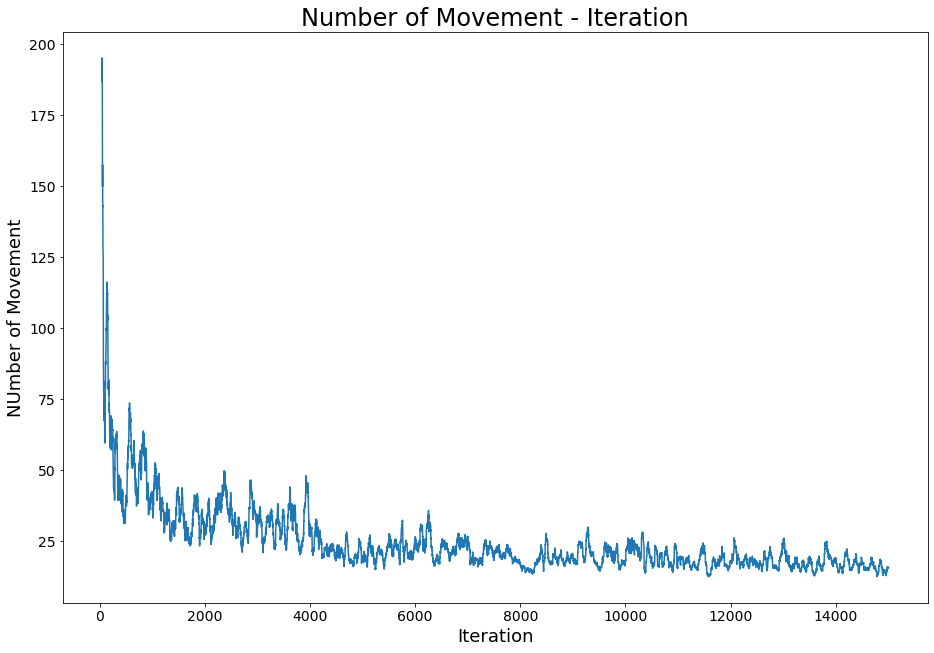

In [182]:
np.random.seed(10)
V,policy=SARSA(LAMBDA=1 ,n_episodes=15000)

#### Gamma = 0.8 & Alpha = 0.2  & epsilon = dynamic

In [154]:
def epsilon_greedy(Q, s,it):
    if it < 500:
        eps = 0.05
        if np.random.random() < eps:
            return np.random.choice(ACTION_SPACE)
        else:
            a_opt = max_dict(Q[s])[0]

        return a_opt
    
    elif (it < 1000) &  (it >= 500):
        eps = 0.08
        if np.random.random() < eps:
            return np.random.choice(ACTION_SPACE)
        else:
            a_opt = max_dict(Q[s])[0]

        return a_opt
    
    elif  (it >= 1000):
        eps = 0.1
        if np.random.random() < eps:
            return np.random.choice(ACTION_SPACE)
        else:
            a_opt = max_dict(Q[s])[0]

        return a_opt

In [155]:
def SARSA(LAMBDA,n_episodes):
    GAMMA = 0.8
    ALPHA = 0.2
    total_movement=[]
    # initialize Q(s,a) and eligibility traces
    Q = {}
    E={}
    for s in states:
        Q[s] = {}
        E[s]={}
        for a in ACTION_SPACE:
            Q[s][a] = 0

    for it in range(n_episodes):
        print(it,'######################################################################################\n\n')
        movement=0
        for s in states:
            for a in ACTION_SPACE:
                E[s][a] = 0
        s= random_initial_state()
        a = epsilon_greedy(Q, s,it)
        visited_state_action={}
        while ( is_terminal(s) == False ):
            if (s,a) not in visited_state_action.keys():
                visited_state_action[(s,a)]=[]
            s2 = get_next_state(s, a)
            r = rewards.get((s, a, s2))
            a2 = epsilon_greedy(Q, s2,it)
            delta=r + GAMMA*Q[s2][a2] - Q[s][a]
            E[s][a]=E[s][a]+1
            for (s,a) in visited_state_action.keys():
#            for s in States:
#                for a in ACTION_SPACE:
                    Q[s][a] = Q[s][a] + ALPHA*delta*E[s][a]
                    E[s][a] = E[s][a]*GAMMA*LAMBDA
            #print(s)
            #print(s2)
            if (is_wall(s2) != 1):
            # next state becomes current state
                s = s2
                a = a2
                #print(s)
                movement +=1
            else :
                s = random_initial_state()
                a = epsilon_greedy(Q, s,it)
                #print('crash the wall:',s)
                movement +=1
        total_movement.append(movement)
        df_total_movement = pd.DataFrame(total_movement)
        rol_total_movement = df_total_movement.rolling(50).mean()
    plt.rcParams["figure.figsize"] = [15.50, 10.50]
    plt.plot(rol_total_movement)
    plt.title('Number of Movement - Iteration', fontsize=24)
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('NUmber of Movement', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    policy = {}
    V = {}
    for s in states:
        a, max_q = max_dict(Q[s])
        policy[s]= a
        V[s] = max_q
    return V,policy

0 ######################################################################################


1 ######################################################################################


2 ######################################################################################


3 ######################################################################################


4 ######################################################################################


5 ######################################################################################


6 ######################################################################################


7 ######################################################################################


8 ######################################################################################


9 ######################################################################################


10 ######################################################################################


90 ######################################################################################


91 ######################################################################################


92 ######################################################################################


93 ######################################################################################


94 ######################################################################################


95 ######################################################################################


96 ######################################################################################


97 ######################################################################################


98 ######################################################################################


99 ######################################################################################


100 ############################################################################

179 ######################################################################################


180 ######################################################################################


181 ######################################################################################


182 ######################################################################################


183 ######################################################################################


184 ######################################################################################


185 ######################################################################################


186 ######################################################################################


187 ######################################################################################


188 ######################################################################################


189 ##################################################################

268 ######################################################################################


269 ######################################################################################


270 ######################################################################################


271 ######################################################################################


272 ######################################################################################


273 ######################################################################################


274 ######################################################################################


275 ######################################################################################


276 ######################################################################################


277 ######################################################################################


278 ##################################################################

357 ######################################################################################


358 ######################################################################################


359 ######################################################################################


360 ######################################################################################


361 ######################################################################################


362 ######################################################################################


363 ######################################################################################


364 ######################################################################################


365 ######################################################################################


366 ######################################################################################


367 ##################################################################

446 ######################################################################################


447 ######################################################################################


448 ######################################################################################


449 ######################################################################################


450 ######################################################################################


451 ######################################################################################


452 ######################################################################################


453 ######################################################################################


454 ######################################################################################


455 ######################################################################################


456 ##################################################################

535 ######################################################################################


536 ######################################################################################


537 ######################################################################################


538 ######################################################################################


539 ######################################################################################


540 ######################################################################################


541 ######################################################################################


542 ######################################################################################


543 ######################################################################################


544 ######################################################################################


545 ##################################################################

624 ######################################################################################


625 ######################################################################################


626 ######################################################################################


627 ######################################################################################


628 ######################################################################################


629 ######################################################################################


630 ######################################################################################


631 ######################################################################################


632 ######################################################################################


633 ######################################################################################


634 ##################################################################

713 ######################################################################################


714 ######################################################################################


715 ######################################################################################


716 ######################################################################################


717 ######################################################################################


718 ######################################################################################


719 ######################################################################################


720 ######################################################################################


721 ######################################################################################


722 ######################################################################################


723 ##################################################################

802 ######################################################################################


803 ######################################################################################


804 ######################################################################################


805 ######################################################################################


806 ######################################################################################


807 ######################################################################################


808 ######################################################################################


809 ######################################################################################


810 ######################################################################################


811 ######################################################################################


812 ##################################################################

891 ######################################################################################


892 ######################################################################################


893 ######################################################################################


894 ######################################################################################


895 ######################################################################################


896 ######################################################################################


897 ######################################################################################


898 ######################################################################################


899 ######################################################################################


900 ######################################################################################


901 ##################################################################

980 ######################################################################################


981 ######################################################################################


982 ######################################################################################


983 ######################################################################################


984 ######################################################################################


985 ######################################################################################


986 ######################################################################################


987 ######################################################################################


988 ######################################################################################


989 ######################################################################################


990 ##################################################################

1068 ######################################################################################


1069 ######################################################################################


1070 ######################################################################################


1071 ######################################################################################


1072 ######################################################################################


1073 ######################################################################################


1074 ######################################################################################


1075 ######################################################################################


1076 ######################################################################################


1077 ######################################################################################


1078 #######################################################

1156 ######################################################################################


1157 ######################################################################################


1158 ######################################################################################


1159 ######################################################################################


1160 ######################################################################################


1161 ######################################################################################


1162 ######################################################################################


1163 ######################################################################################


1164 ######################################################################################


1165 ######################################################################################


1166 #######################################################

1244 ######################################################################################


1245 ######################################################################################


1246 ######################################################################################


1247 ######################################################################################


1248 ######################################################################################


1249 ######################################################################################


1250 ######################################################################################


1251 ######################################################################################


1252 ######################################################################################


1253 ######################################################################################


1254 #######################################################

1332 ######################################################################################


1333 ######################################################################################


1334 ######################################################################################


1335 ######################################################################################


1336 ######################################################################################


1337 ######################################################################################


1338 ######################################################################################


1339 ######################################################################################


1340 ######################################################################################


1341 ######################################################################################


1342 #######################################################

1420 ######################################################################################


1421 ######################################################################################


1422 ######################################################################################


1423 ######################################################################################


1424 ######################################################################################


1425 ######################################################################################


1426 ######################################################################################


1427 ######################################################################################


1428 ######################################################################################


1429 ######################################################################################


1430 #######################################################

1508 ######################################################################################


1509 ######################################################################################


1510 ######################################################################################


1511 ######################################################################################


1512 ######################################################################################


1513 ######################################################################################


1514 ######################################################################################


1515 ######################################################################################


1516 ######################################################################################


1517 ######################################################################################


1518 #######################################################

1596 ######################################################################################


1597 ######################################################################################


1598 ######################################################################################


1599 ######################################################################################


1600 ######################################################################################


1601 ######################################################################################


1602 ######################################################################################


1603 ######################################################################################


1604 ######################################################################################


1605 ######################################################################################


1606 #######################################################

1684 ######################################################################################


1685 ######################################################################################


1686 ######################################################################################


1687 ######################################################################################


1688 ######################################################################################


1689 ######################################################################################


1690 ######################################################################################


1691 ######################################################################################


1692 ######################################################################################


1693 ######################################################################################


1694 #######################################################

1772 ######################################################################################


1773 ######################################################################################


1774 ######################################################################################


1775 ######################################################################################


1776 ######################################################################################


1777 ######################################################################################


1778 ######################################################################################


1779 ######################################################################################


1780 ######################################################################################


1781 ######################################################################################


1782 #######################################################

1860 ######################################################################################


1861 ######################################################################################


1862 ######################################################################################


1863 ######################################################################################


1864 ######################################################################################


1865 ######################################################################################


1866 ######################################################################################


1867 ######################################################################################


1868 ######################################################################################


1869 ######################################################################################


1870 #######################################################

1948 ######################################################################################


1949 ######################################################################################


1950 ######################################################################################


1951 ######################################################################################


1952 ######################################################################################


1953 ######################################################################################


1954 ######################################################################################


1955 ######################################################################################


1956 ######################################################################################


1957 ######################################################################################


1958 #######################################################

2036 ######################################################################################


2037 ######################################################################################


2038 ######################################################################################


2039 ######################################################################################


2040 ######################################################################################


2041 ######################################################################################


2042 ######################################################################################


2043 ######################################################################################


2044 ######################################################################################


2045 ######################################################################################


2046 #######################################################

2124 ######################################################################################


2125 ######################################################################################


2126 ######################################################################################


2127 ######################################################################################


2128 ######################################################################################


2129 ######################################################################################


2130 ######################################################################################


2131 ######################################################################################


2132 ######################################################################################


2133 ######################################################################################


2134 #######################################################

2212 ######################################################################################


2213 ######################################################################################


2214 ######################################################################################


2215 ######################################################################################


2216 ######################################################################################


2217 ######################################################################################


2218 ######################################################################################


2219 ######################################################################################


2220 ######################################################################################


2221 ######################################################################################


2222 #######################################################

2300 ######################################################################################


2301 ######################################################################################


2302 ######################################################################################


2303 ######################################################################################


2304 ######################################################################################


2305 ######################################################################################


2306 ######################################################################################


2307 ######################################################################################


2308 ######################################################################################


2309 ######################################################################################


2310 #######################################################

2388 ######################################################################################


2389 ######################################################################################


2390 ######################################################################################


2391 ######################################################################################


2392 ######################################################################################


2393 ######################################################################################


2394 ######################################################################################


2395 ######################################################################################


2396 ######################################################################################


2397 ######################################################################################


2398 #######################################################

2476 ######################################################################################


2477 ######################################################################################


2478 ######################################################################################


2479 ######################################################################################


2480 ######################################################################################


2481 ######################################################################################


2482 ######################################################################################


2483 ######################################################################################


2484 ######################################################################################


2485 ######################################################################################


2486 #######################################################

2564 ######################################################################################


2565 ######################################################################################


2566 ######################################################################################


2567 ######################################################################################


2568 ######################################################################################


2569 ######################################################################################


2570 ######################################################################################


2571 ######################################################################################


2572 ######################################################################################


2573 ######################################################################################


2574 #######################################################

2652 ######################################################################################


2653 ######################################################################################


2654 ######################################################################################


2655 ######################################################################################


2656 ######################################################################################


2657 ######################################################################################


2658 ######################################################################################


2659 ######################################################################################


2660 ######################################################################################


2661 ######################################################################################


2662 #######################################################

2740 ######################################################################################


2741 ######################################################################################


2742 ######################################################################################


2743 ######################################################################################


2744 ######################################################################################


2745 ######################################################################################


2746 ######################################################################################


2747 ######################################################################################


2748 ######################################################################################


2749 ######################################################################################


2750 #######################################################

2828 ######################################################################################


2829 ######################################################################################


2830 ######################################################################################


2831 ######################################################################################


2832 ######################################################################################


2833 ######################################################################################


2834 ######################################################################################


2835 ######################################################################################


2836 ######################################################################################


2837 ######################################################################################


2838 #######################################################

2916 ######################################################################################


2917 ######################################################################################


2918 ######################################################################################


2919 ######################################################################################


2920 ######################################################################################


2921 ######################################################################################


2922 ######################################################################################


2923 ######################################################################################


2924 ######################################################################################


2925 ######################################################################################


2926 #######################################################

3004 ######################################################################################


3005 ######################################################################################


3006 ######################################################################################


3007 ######################################################################################


3008 ######################################################################################


3009 ######################################################################################


3010 ######################################################################################


3011 ######################################################################################


3012 ######################################################################################


3013 ######################################################################################


3014 #######################################################

3092 ######################################################################################


3093 ######################################################################################


3094 ######################################################################################


3095 ######################################################################################


3096 ######################################################################################


3097 ######################################################################################


3098 ######################################################################################


3099 ######################################################################################


3100 ######################################################################################


3101 ######################################################################################


3102 #######################################################

3180 ######################################################################################


3181 ######################################################################################


3182 ######################################################################################


3183 ######################################################################################


3184 ######################################################################################


3185 ######################################################################################


3186 ######################################################################################


3187 ######################################################################################


3188 ######################################################################################


3189 ######################################################################################


3190 #######################################################

3269 ######################################################################################


3270 ######################################################################################


3271 ######################################################################################


3272 ######################################################################################


3273 ######################################################################################


3274 ######################################################################################


3275 ######################################################################################


3276 ######################################################################################


3277 ######################################################################################


3278 ######################################################################################


3279 #######################################################

3357 ######################################################################################


3358 ######################################################################################


3359 ######################################################################################


3360 ######################################################################################


3361 ######################################################################################


3362 ######################################################################################


3363 ######################################################################################


3364 ######################################################################################


3365 ######################################################################################


3366 ######################################################################################


3367 #######################################################

3445 ######################################################################################


3446 ######################################################################################


3447 ######################################################################################


3448 ######################################################################################


3449 ######################################################################################


3450 ######################################################################################


3451 ######################################################################################


3452 ######################################################################################


3453 ######################################################################################


3454 ######################################################################################


3455 #######################################################

3533 ######################################################################################


3534 ######################################################################################


3535 ######################################################################################


3536 ######################################################################################


3537 ######################################################################################


3538 ######################################################################################


3539 ######################################################################################


3540 ######################################################################################


3541 ######################################################################################


3542 ######################################################################################


3543 #######################################################

3621 ######################################################################################


3622 ######################################################################################


3623 ######################################################################################


3624 ######################################################################################


3625 ######################################################################################


3626 ######################################################################################


3627 ######################################################################################


3628 ######################################################################################


3629 ######################################################################################


3630 ######################################################################################


3631 #######################################################

3709 ######################################################################################


3710 ######################################################################################


3711 ######################################################################################


3712 ######################################################################################


3713 ######################################################################################


3714 ######################################################################################


3715 ######################################################################################


3716 ######################################################################################


3717 ######################################################################################


3718 ######################################################################################


3719 #######################################################

3797 ######################################################################################


3798 ######################################################################################


3799 ######################################################################################


3800 ######################################################################################


3801 ######################################################################################


3802 ######################################################################################


3803 ######################################################################################


3804 ######################################################################################


3805 ######################################################################################


3806 ######################################################################################


3807 #######################################################

3885 ######################################################################################


3886 ######################################################################################


3887 ######################################################################################


3888 ######################################################################################


3889 ######################################################################################


3890 ######################################################################################


3891 ######################################################################################


3892 ######################################################################################


3893 ######################################################################################


3894 ######################################################################################


3895 #######################################################

3973 ######################################################################################


3974 ######################################################################################


3975 ######################################################################################


3976 ######################################################################################


3977 ######################################################################################


3978 ######################################################################################


3979 ######################################################################################


3980 ######################################################################################


3981 ######################################################################################


3982 ######################################################################################


3983 #######################################################

4061 ######################################################################################


4062 ######################################################################################


4063 ######################################################################################


4064 ######################################################################################


4065 ######################################################################################


4066 ######################################################################################


4067 ######################################################################################


4068 ######################################################################################


4069 ######################################################################################


4070 ######################################################################################


4071 #######################################################

4149 ######################################################################################


4150 ######################################################################################


4151 ######################################################################################


4152 ######################################################################################


4153 ######################################################################################


4154 ######################################################################################


4155 ######################################################################################


4156 ######################################################################################


4157 ######################################################################################


4158 ######################################################################################


4159 #######################################################

4238 ######################################################################################


4239 ######################################################################################


4240 ######################################################################################


4241 ######################################################################################


4242 ######################################################################################


4243 ######################################################################################


4244 ######################################################################################


4245 ######################################################################################


4246 ######################################################################################


4247 ######################################################################################


4248 #######################################################

4327 ######################################################################################


4328 ######################################################################################


4329 ######################################################################################


4330 ######################################################################################


4331 ######################################################################################


4332 ######################################################################################


4333 ######################################################################################


4334 ######################################################################################


4335 ######################################################################################


4336 ######################################################################################


4337 #######################################################

4415 ######################################################################################


4416 ######################################################################################


4417 ######################################################################################


4418 ######################################################################################


4419 ######################################################################################


4420 ######################################################################################


4421 ######################################################################################


4422 ######################################################################################


4423 ######################################################################################


4424 ######################################################################################


4425 #######################################################

4504 ######################################################################################


4505 ######################################################################################


4506 ######################################################################################


4507 ######################################################################################


4508 ######################################################################################


4509 ######################################################################################


4510 ######################################################################################


4511 ######################################################################################


4512 ######################################################################################


4513 ######################################################################################


4514 #######################################################

4592 ######################################################################################


4593 ######################################################################################


4594 ######################################################################################


4595 ######################################################################################


4596 ######################################################################################


4597 ######################################################################################


4598 ######################################################################################


4599 ######################################################################################


4600 ######################################################################################


4601 ######################################################################################


4602 #######################################################

4680 ######################################################################################


4681 ######################################################################################


4682 ######################################################################################


4683 ######################################################################################


4684 ######################################################################################


4685 ######################################################################################


4686 ######################################################################################


4687 ######################################################################################


4688 ######################################################################################


4689 ######################################################################################


4690 #######################################################

4768 ######################################################################################


4769 ######################################################################################


4770 ######################################################################################


4771 ######################################################################################


4772 ######################################################################################


4773 ######################################################################################


4774 ######################################################################################


4775 ######################################################################################


4776 ######################################################################################


4777 ######################################################################################


4778 #######################################################

4856 ######################################################################################


4857 ######################################################################################


4858 ######################################################################################


4859 ######################################################################################


4860 ######################################################################################


4861 ######################################################################################


4862 ######################################################################################


4863 ######################################################################################


4864 ######################################################################################


4865 ######################################################################################


4866 #######################################################

4944 ######################################################################################


4945 ######################################################################################


4946 ######################################################################################


4947 ######################################################################################


4948 ######################################################################################


4949 ######################################################################################


4950 ######################################################################################


4951 ######################################################################################


4952 ######################################################################################


4953 ######################################################################################


4954 #######################################################

5032 ######################################################################################


5033 ######################################################################################


5034 ######################################################################################


5035 ######################################################################################


5036 ######################################################################################


5037 ######################################################################################


5038 ######################################################################################


5039 ######################################################################################


5040 ######################################################################################


5041 ######################################################################################


5042 #######################################################

5120 ######################################################################################


5121 ######################################################################################


5122 ######################################################################################


5123 ######################################################################################


5124 ######################################################################################


5125 ######################################################################################


5126 ######################################################################################


5127 ######################################################################################


5128 ######################################################################################


5129 ######################################################################################


5130 #######################################################

5208 ######################################################################################


5209 ######################################################################################


5210 ######################################################################################


5211 ######################################################################################


5212 ######################################################################################


5213 ######################################################################################


5214 ######################################################################################


5215 ######################################################################################


5216 ######################################################################################


5217 ######################################################################################


5218 #######################################################

5296 ######################################################################################


5297 ######################################################################################


5298 ######################################################################################


5299 ######################################################################################


5300 ######################################################################################


5301 ######################################################################################


5302 ######################################################################################


5303 ######################################################################################


5304 ######################################################################################


5305 ######################################################################################


5306 #######################################################

5384 ######################################################################################


5385 ######################################################################################


5386 ######################################################################################


5387 ######################################################################################


5388 ######################################################################################


5389 ######################################################################################


5390 ######################################################################################


5391 ######################################################################################


5392 ######################################################################################


5393 ######################################################################################


5394 #######################################################

5472 ######################################################################################


5473 ######################################################################################


5474 ######################################################################################


5475 ######################################################################################


5476 ######################################################################################


5477 ######################################################################################


5478 ######################################################################################


5479 ######################################################################################


5480 ######################################################################################


5481 ######################################################################################


5482 #######################################################

5560 ######################################################################################


5561 ######################################################################################


5562 ######################################################################################


5563 ######################################################################################


5564 ######################################################################################


5565 ######################################################################################


5566 ######################################################################################


5567 ######################################################################################


5568 ######################################################################################


5569 ######################################################################################


5570 #######################################################

5648 ######################################################################################


5649 ######################################################################################


5650 ######################################################################################


5651 ######################################################################################


5652 ######################################################################################


5653 ######################################################################################


5654 ######################################################################################


5655 ######################################################################################


5656 ######################################################################################


5657 ######################################################################################


5658 #######################################################

5736 ######################################################################################


5737 ######################################################################################


5738 ######################################################################################


5739 ######################################################################################


5740 ######################################################################################


5741 ######################################################################################


5742 ######################################################################################


5743 ######################################################################################


5744 ######################################################################################


5745 ######################################################################################


5746 #######################################################

5824 ######################################################################################


5825 ######################################################################################


5826 ######################################################################################


5827 ######################################################################################


5828 ######################################################################################


5829 ######################################################################################


5830 ######################################################################################


5831 ######################################################################################


5832 ######################################################################################


5833 ######################################################################################


5834 #######################################################

5912 ######################################################################################


5913 ######################################################################################


5914 ######################################################################################


5915 ######################################################################################


5916 ######################################################################################


5917 ######################################################################################


5918 ######################################################################################


5919 ######################################################################################


5920 ######################################################################################


5921 ######################################################################################


5922 #######################################################

6000 ######################################################################################


6001 ######################################################################################


6002 ######################################################################################


6003 ######################################################################################


6004 ######################################################################################


6005 ######################################################################################


6006 ######################################################################################


6007 ######################################################################################


6008 ######################################################################################


6009 ######################################################################################


6010 #######################################################

6088 ######################################################################################


6089 ######################################################################################


6090 ######################################################################################


6091 ######################################################################################


6092 ######################################################################################


6093 ######################################################################################


6094 ######################################################################################


6095 ######################################################################################


6096 ######################################################################################


6097 ######################################################################################


6098 #######################################################

6176 ######################################################################################


6177 ######################################################################################


6178 ######################################################################################


6179 ######################################################################################


6180 ######################################################################################


6181 ######################################################################################


6182 ######################################################################################


6183 ######################################################################################


6184 ######################################################################################


6185 ######################################################################################


6186 #######################################################

6264 ######################################################################################


6265 ######################################################################################


6266 ######################################################################################


6267 ######################################################################################


6268 ######################################################################################


6269 ######################################################################################


6270 ######################################################################################


6271 ######################################################################################


6272 ######################################################################################


6273 ######################################################################################


6274 #######################################################

6353 ######################################################################################


6354 ######################################################################################


6355 ######################################################################################


6356 ######################################################################################


6357 ######################################################################################


6358 ######################################################################################


6359 ######################################################################################


6360 ######################################################################################


6361 ######################################################################################


6362 ######################################################################################


6363 #######################################################

6441 ######################################################################################


6442 ######################################################################################


6443 ######################################################################################


6444 ######################################################################################


6445 ######################################################################################


6446 ######################################################################################


6447 ######################################################################################


6448 ######################################################################################


6449 ######################################################################################


6450 ######################################################################################


6451 #######################################################

6529 ######################################################################################


6530 ######################################################################################


6531 ######################################################################################


6532 ######################################################################################


6533 ######################################################################################


6534 ######################################################################################


6535 ######################################################################################


6536 ######################################################################################


6537 ######################################################################################


6538 ######################################################################################


6539 #######################################################

6617 ######################################################################################


6618 ######################################################################################


6619 ######################################################################################


6620 ######################################################################################


6621 ######################################################################################


6622 ######################################################################################


6623 ######################################################################################


6624 ######################################################################################


6625 ######################################################################################


6626 ######################################################################################


6627 #######################################################


6705 ######################################################################################


6706 ######################################################################################


6707 ######################################################################################


6708 ######################################################################################


6709 ######################################################################################


6710 ######################################################################################


6711 ######################################################################################


6712 ######################################################################################


6713 ######################################################################################


6714 ######################################################################################


6715 ######################################################

6794 ######################################################################################


6795 ######################################################################################


6796 ######################################################################################


6797 ######################################################################################


6798 ######################################################################################


6799 ######################################################################################


6800 ######################################################################################


6801 ######################################################################################


6802 ######################################################################################


6803 ######################################################################################


6804 #######################################################

6883 ######################################################################################


6884 ######################################################################################


6885 ######################################################################################


6886 ######################################################################################


6887 ######################################################################################


6888 ######################################################################################


6889 ######################################################################################


6890 ######################################################################################


6891 ######################################################################################


6892 ######################################################################################


6893 #######################################################

6971 ######################################################################################


6972 ######################################################################################


6973 ######################################################################################


6974 ######################################################################################


6975 ######################################################################################


6976 ######################################################################################


6977 ######################################################################################


6978 ######################################################################################


6979 ######################################################################################


6980 ######################################################################################


6981 #######################################################

7059 ######################################################################################


7060 ######################################################################################


7061 ######################################################################################


7062 ######################################################################################


7063 ######################################################################################


7064 ######################################################################################


7065 ######################################################################################


7066 ######################################################################################


7067 ######################################################################################


7068 ######################################################################################


7069 #######################################################

7147 ######################################################################################


7148 ######################################################################################


7149 ######################################################################################


7150 ######################################################################################


7151 ######################################################################################


7152 ######################################################################################


7153 ######################################################################################


7154 ######################################################################################


7155 ######################################################################################


7156 ######################################################################################


7157 #######################################################

7236 ######################################################################################


7237 ######################################################################################


7238 ######################################################################################


7239 ######################################################################################


7240 ######################################################################################


7241 ######################################################################################


7242 ######################################################################################


7243 ######################################################################################


7244 ######################################################################################


7245 ######################################################################################


7246 #######################################################

7324 ######################################################################################


7325 ######################################################################################


7326 ######################################################################################


7327 ######################################################################################


7328 ######################################################################################


7329 ######################################################################################


7330 ######################################################################################


7331 ######################################################################################


7332 ######################################################################################


7333 ######################################################################################


7334 #######################################################

7412 ######################################################################################


7413 ######################################################################################


7414 ######################################################################################


7415 ######################################################################################


7416 ######################################################################################


7417 ######################################################################################


7418 ######################################################################################


7419 ######################################################################################


7420 ######################################################################################


7421 ######################################################################################


7422 #######################################################

7500 ######################################################################################


7501 ######################################################################################


7502 ######################################################################################


7503 ######################################################################################


7504 ######################################################################################


7505 ######################################################################################


7506 ######################################################################################


7507 ######################################################################################


7508 ######################################################################################


7509 ######################################################################################


7510 #######################################################

7588 ######################################################################################


7589 ######################################################################################


7590 ######################################################################################


7591 ######################################################################################


7592 ######################################################################################


7593 ######################################################################################


7594 ######################################################################################


7595 ######################################################################################


7596 ######################################################################################


7597 ######################################################################################


7598 #######################################################

7676 ######################################################################################


7677 ######################################################################################


7678 ######################################################################################


7679 ######################################################################################


7680 ######################################################################################


7681 ######################################################################################


7682 ######################################################################################


7683 ######################################################################################


7684 ######################################################################################


7685 ######################################################################################


7686 #######################################################

7765 ######################################################################################


7766 ######################################################################################


7767 ######################################################################################


7768 ######################################################################################


7769 ######################################################################################


7770 ######################################################################################


7771 ######################################################################################


7772 ######################################################################################


7773 ######################################################################################


7774 ######################################################################################


7775 #######################################################

7853 ######################################################################################


7854 ######################################################################################


7855 ######################################################################################


7856 ######################################################################################


7857 ######################################################################################


7858 ######################################################################################


7859 ######################################################################################


7860 ######################################################################################


7861 ######################################################################################


7862 ######################################################################################


7863 #######################################################

7941 ######################################################################################


7942 ######################################################################################


7943 ######################################################################################


7944 ######################################################################################


7945 ######################################################################################


7946 ######################################################################################


7947 ######################################################################################


7948 ######################################################################################


7949 ######################################################################################


7950 ######################################################################################


7951 #######################################################

8029 ######################################################################################


8030 ######################################################################################


8031 ######################################################################################


8032 ######################################################################################


8033 ######################################################################################


8034 ######################################################################################


8035 ######################################################################################


8036 ######################################################################################


8037 ######################################################################################


8038 ######################################################################################


8039 #######################################################

8118 ######################################################################################


8119 ######################################################################################


8120 ######################################################################################


8121 ######################################################################################


8122 ######################################################################################


8123 ######################################################################################


8124 ######################################################################################


8125 ######################################################################################


8126 ######################################################################################


8127 ######################################################################################


8128 #######################################################

8206 ######################################################################################


8207 ######################################################################################


8208 ######################################################################################


8209 ######################################################################################


8210 ######################################################################################


8211 ######################################################################################


8212 ######################################################################################


8213 ######################################################################################


8214 ######################################################################################


8215 ######################################################################################


8216 #######################################################

8294 ######################################################################################


8295 ######################################################################################


8296 ######################################################################################


8297 ######################################################################################


8298 ######################################################################################


8299 ######################################################################################


8300 ######################################################################################


8301 ######################################################################################


8302 ######################################################################################


8303 ######################################################################################


8304 #######################################################

8382 ######################################################################################


8383 ######################################################################################


8384 ######################################################################################


8385 ######################################################################################


8386 ######################################################################################


8387 ######################################################################################


8388 ######################################################################################


8389 ######################################################################################


8390 ######################################################################################


8391 ######################################################################################


8392 #######################################################

8470 ######################################################################################


8471 ######################################################################################


8472 ######################################################################################


8473 ######################################################################################


8474 ######################################################################################


8475 ######################################################################################


8476 ######################################################################################


8477 ######################################################################################


8478 ######################################################################################


8479 ######################################################################################


8480 #######################################################

8558 ######################################################################################


8559 ######################################################################################


8560 ######################################################################################


8561 ######################################################################################


8562 ######################################################################################


8563 ######################################################################################


8564 ######################################################################################


8565 ######################################################################################


8566 ######################################################################################


8567 ######################################################################################


8568 #######################################################

8646 ######################################################################################


8647 ######################################################################################


8648 ######################################################################################


8649 ######################################################################################


8650 ######################################################################################


8651 ######################################################################################


8652 ######################################################################################


8653 ######################################################################################


8654 ######################################################################################


8655 ######################################################################################


8656 #######################################################

8734 ######################################################################################


8735 ######################################################################################


8736 ######################################################################################


8737 ######################################################################################


8738 ######################################################################################


8739 ######################################################################################


8740 ######################################################################################


8741 ######################################################################################


8742 ######################################################################################


8743 ######################################################################################


8744 #######################################################

8823 ######################################################################################


8824 ######################################################################################


8825 ######################################################################################


8826 ######################################################################################


8827 ######################################################################################


8828 ######################################################################################


8829 ######################################################################################


8830 ######################################################################################


8831 ######################################################################################


8832 ######################################################################################


8833 #######################################################

8911 ######################################################################################


8912 ######################################################################################


8913 ######################################################################################


8914 ######################################################################################


8915 ######################################################################################


8916 ######################################################################################


8917 ######################################################################################


8918 ######################################################################################


8919 ######################################################################################


8920 ######################################################################################


8921 #######################################################

8999 ######################################################################################


9000 ######################################################################################


9001 ######################################################################################


9002 ######################################################################################


9003 ######################################################################################


9004 ######################################################################################


9005 ######################################################################################


9006 ######################################################################################


9007 ######################################################################################


9008 ######################################################################################


9009 #######################################################

9088 ######################################################################################


9089 ######################################################################################


9090 ######################################################################################


9091 ######################################################################################


9092 ######################################################################################


9093 ######################################################################################


9094 ######################################################################################


9095 ######################################################################################


9096 ######################################################################################


9097 ######################################################################################


9098 #######################################################

9176 ######################################################################################


9177 ######################################################################################


9178 ######################################################################################


9179 ######################################################################################


9180 ######################################################################################


9181 ######################################################################################


9182 ######################################################################################


9183 ######################################################################################


9184 ######################################################################################


9185 ######################################################################################


9186 #######################################################

9265 ######################################################################################


9266 ######################################################################################


9267 ######################################################################################


9268 ######################################################################################


9269 ######################################################################################


9270 ######################################################################################


9271 ######################################################################################


9272 ######################################################################################


9273 ######################################################################################


9274 ######################################################################################


9275 #######################################################

9354 ######################################################################################


9355 ######################################################################################


9356 ######################################################################################


9357 ######################################################################################


9358 ######################################################################################


9359 ######################################################################################


9360 ######################################################################################


9361 ######################################################################################


9362 ######################################################################################


9363 ######################################################################################


9364 #######################################################

9442 ######################################################################################


9443 ######################################################################################


9444 ######################################################################################


9445 ######################################################################################


9446 ######################################################################################


9447 ######################################################################################


9448 ######################################################################################


9449 ######################################################################################


9450 ######################################################################################


9451 ######################################################################################


9452 #######################################################

9530 ######################################################################################


9531 ######################################################################################


9532 ######################################################################################


9533 ######################################################################################


9534 ######################################################################################


9535 ######################################################################################


9536 ######################################################################################


9537 ######################################################################################


9538 ######################################################################################


9539 ######################################################################################


9540 #######################################################

9618 ######################################################################################


9619 ######################################################################################


9620 ######################################################################################


9621 ######################################################################################


9622 ######################################################################################


9623 ######################################################################################


9624 ######################################################################################


9625 ######################################################################################


9626 ######################################################################################


9627 ######################################################################################


9628 #######################################################

9706 ######################################################################################


9707 ######################################################################################


9708 ######################################################################################


9709 ######################################################################################


9710 ######################################################################################


9711 ######################################################################################


9712 ######################################################################################


9713 ######################################################################################


9714 ######################################################################################


9715 ######################################################################################


9716 #######################################################

9794 ######################################################################################


9795 ######################################################################################


9796 ######################################################################################


9797 ######################################################################################


9798 ######################################################################################


9799 ######################################################################################


9800 ######################################################################################


9801 ######################################################################################


9802 ######################################################################################


9803 ######################################################################################


9804 #######################################################

9882 ######################################################################################


9883 ######################################################################################


9884 ######################################################################################


9885 ######################################################################################


9886 ######################################################################################


9887 ######################################################################################


9888 ######################################################################################


9889 ######################################################################################


9890 ######################################################################################


9891 ######################################################################################


9892 #######################################################

9971 ######################################################################################


9972 ######################################################################################


9973 ######################################################################################


9974 ######################################################################################


9975 ######################################################################################


9976 ######################################################################################


9977 ######################################################################################


9978 ######################################################################################


9979 ######################################################################################


9980 ######################################################################################


9981 #######################################################

10058 ######################################################################################


10059 ######################################################################################


10060 ######################################################################################


10061 ######################################################################################


10062 ######################################################################################


10063 ######################################################################################


10064 ######################################################################################


10065 ######################################################################################


10066 ######################################################################################


10067 ######################################################################################


10068 ############################################

10145 ######################################################################################


10146 ######################################################################################


10147 ######################################################################################


10148 ######################################################################################


10149 ######################################################################################


10150 ######################################################################################


10151 ######################################################################################


10152 ######################################################################################


10153 ######################################################################################


10154 ######################################################################################


10155 ############################################

10232 ######################################################################################


10233 ######################################################################################


10234 ######################################################################################


10235 ######################################################################################


10236 ######################################################################################


10237 ######################################################################################


10238 ######################################################################################


10239 ######################################################################################


10240 ######################################################################################


10241 ######################################################################################


10242 ############################################

10319 ######################################################################################


10320 ######################################################################################


10321 ######################################################################################


10322 ######################################################################################


10323 ######################################################################################


10324 ######################################################################################


10325 ######################################################################################


10326 ######################################################################################


10327 ######################################################################################


10328 ######################################################################################


10329 ############################################

10407 ######################################################################################


10408 ######################################################################################


10409 ######################################################################################


10410 ######################################################################################


10411 ######################################################################################


10412 ######################################################################################


10413 ######################################################################################


10414 ######################################################################################


10415 ######################################################################################


10416 ######################################################################################


10417 ############################################

10495 ######################################################################################


10496 ######################################################################################


10497 ######################################################################################


10498 ######################################################################################


10499 ######################################################################################


10500 ######################################################################################


10501 ######################################################################################


10502 ######################################################################################


10503 ######################################################################################


10504 ######################################################################################


10505 ############################################

10582 ######################################################################################


10583 ######################################################################################


10584 ######################################################################################


10585 ######################################################################################


10586 ######################################################################################


10587 ######################################################################################


10588 ######################################################################################


10589 ######################################################################################


10590 ######################################################################################


10591 ######################################################################################


10592 ############################################

10669 ######################################################################################


10670 ######################################################################################


10671 ######################################################################################


10672 ######################################################################################


10673 ######################################################################################


10674 ######################################################################################


10675 ######################################################################################


10676 ######################################################################################


10677 ######################################################################################


10678 ######################################################################################


10679 ############################################

10756 ######################################################################################


10757 ######################################################################################


10758 ######################################################################################


10759 ######################################################################################


10760 ######################################################################################


10761 ######################################################################################


10762 ######################################################################################


10763 ######################################################################################


10764 ######################################################################################


10765 ######################################################################################


10766 ############################################

10843 ######################################################################################


10844 ######################################################################################


10845 ######################################################################################


10846 ######################################################################################


10847 ######################################################################################


10848 ######################################################################################


10849 ######################################################################################


10850 ######################################################################################


10851 ######################################################################################


10852 ######################################################################################


10853 ############################################

10930 ######################################################################################


10931 ######################################################################################


10932 ######################################################################################


10933 ######################################################################################


10934 ######################################################################################


10935 ######################################################################################


10936 ######################################################################################


10937 ######################################################################################


10938 ######################################################################################


10939 ######################################################################################


10940 ############################################

11017 ######################################################################################


11018 ######################################################################################


11019 ######################################################################################


11020 ######################################################################################


11021 ######################################################################################


11022 ######################################################################################


11023 ######################################################################################


11024 ######################################################################################


11025 ######################################################################################


11026 ######################################################################################


11027 ############################################

11104 ######################################################################################


11105 ######################################################################################


11106 ######################################################################################


11107 ######################################################################################


11108 ######################################################################################


11109 ######################################################################################


11110 ######################################################################################


11111 ######################################################################################


11112 ######################################################################################


11113 ######################################################################################


11114 ############################################

11191 ######################################################################################


11192 ######################################################################################


11193 ######################################################################################


11194 ######################################################################################


11195 ######################################################################################


11196 ######################################################################################


11197 ######################################################################################


11198 ######################################################################################


11199 ######################################################################################


11200 ######################################################################################


11201 ############################################

11278 ######################################################################################


11279 ######################################################################################


11280 ######################################################################################


11281 ######################################################################################


11282 ######################################################################################


11283 ######################################################################################


11284 ######################################################################################


11285 ######################################################################################


11286 ######################################################################################


11287 ######################################################################################


11288 ############################################

11365 ######################################################################################


11366 ######################################################################################


11367 ######################################################################################


11368 ######################################################################################


11369 ######################################################################################


11370 ######################################################################################


11371 ######################################################################################


11372 ######################################################################################


11373 ######################################################################################


11374 ######################################################################################


11375 ############################################

11452 ######################################################################################


11453 ######################################################################################


11454 ######################################################################################


11455 ######################################################################################


11456 ######################################################################################


11457 ######################################################################################


11458 ######################################################################################


11459 ######################################################################################


11460 ######################################################################################


11461 ######################################################################################


11462 ############################################

11539 ######################################################################################


11540 ######################################################################################


11541 ######################################################################################


11542 ######################################################################################


11543 ######################################################################################


11544 ######################################################################################


11545 ######################################################################################


11546 ######################################################################################


11547 ######################################################################################


11548 ######################################################################################


11549 ############################################

11626 ######################################################################################


11627 ######################################################################################


11628 ######################################################################################


11629 ######################################################################################


11630 ######################################################################################


11631 ######################################################################################


11632 ######################################################################################


11633 ######################################################################################


11634 ######################################################################################


11635 ######################################################################################


11636 ############################################

11714 ######################################################################################


11715 ######################################################################################


11716 ######################################################################################


11717 ######################################################################################


11718 ######################################################################################


11719 ######################################################################################


11720 ######################################################################################


11721 ######################################################################################


11722 ######################################################################################


11723 ######################################################################################


11724 ############################################

11801 ######################################################################################


11802 ######################################################################################


11803 ######################################################################################


11804 ######################################################################################


11805 ######################################################################################


11806 ######################################################################################


11807 ######################################################################################


11808 ######################################################################################


11809 ######################################################################################


11810 ######################################################################################


11811 ############################################

11889 ######################################################################################


11890 ######################################################################################


11891 ######################################################################################


11892 ######################################################################################


11893 ######################################################################################


11894 ######################################################################################


11895 ######################################################################################


11896 ######################################################################################


11897 ######################################################################################


11898 ######################################################################################


11899 ############################################

11977 ######################################################################################


11978 ######################################################################################


11979 ######################################################################################


11980 ######################################################################################


11981 ######################################################################################


11982 ######################################################################################


11983 ######################################################################################


11984 ######################################################################################


11985 ######################################################################################


11986 ######################################################################################


11987 ############################################

12064 ######################################################################################


12065 ######################################################################################


12066 ######################################################################################


12067 ######################################################################################


12068 ######################################################################################


12069 ######################################################################################


12070 ######################################################################################


12071 ######################################################################################


12072 ######################################################################################


12073 ######################################################################################


12074 ############################################

12151 ######################################################################################


12152 ######################################################################################


12153 ######################################################################################


12154 ######################################################################################


12155 ######################################################################################


12156 ######################################################################################


12157 ######################################################################################


12158 ######################################################################################


12159 ######################################################################################


12160 ######################################################################################


12161 ############################################

12238 ######################################################################################


12239 ######################################################################################


12240 ######################################################################################


12241 ######################################################################################


12242 ######################################################################################


12243 ######################################################################################


12244 ######################################################################################


12245 ######################################################################################


12246 ######################################################################################


12247 ######################################################################################


12248 ############################################

12325 ######################################################################################


12326 ######################################################################################


12327 ######################################################################################


12328 ######################################################################################


12329 ######################################################################################


12330 ######################################################################################


12331 ######################################################################################


12332 ######################################################################################


12333 ######################################################################################


12334 ######################################################################################


12335 ############################################

12412 ######################################################################################


12413 ######################################################################################


12414 ######################################################################################


12415 ######################################################################################


12416 ######################################################################################


12417 ######################################################################################


12418 ######################################################################################


12419 ######################################################################################


12420 ######################################################################################


12421 ######################################################################################


12422 ############################################

12500 ######################################################################################


12501 ######################################################################################


12502 ######################################################################################


12503 ######################################################################################


12504 ######################################################################################


12505 ######################################################################################


12506 ######################################################################################


12507 ######################################################################################


12508 ######################################################################################


12509 ######################################################################################


12510 ############################################

12587 ######################################################################################


12588 ######################################################################################


12589 ######################################################################################


12590 ######################################################################################


12591 ######################################################################################


12592 ######################################################################################


12593 ######################################################################################


12594 ######################################################################################


12595 ######################################################################################


12596 ######################################################################################


12597 ############################################

12674 ######################################################################################


12675 ######################################################################################


12676 ######################################################################################


12677 ######################################################################################


12678 ######################################################################################


12679 ######################################################################################


12680 ######################################################################################


12681 ######################################################################################


12682 ######################################################################################


12683 ######################################################################################


12684 ############################################

12761 ######################################################################################


12762 ######################################################################################


12763 ######################################################################################


12764 ######################################################################################


12765 ######################################################################################


12766 ######################################################################################


12767 ######################################################################################


12768 ######################################################################################


12769 ######################################################################################


12770 ######################################################################################


12771 ############################################

12848 ######################################################################################


12849 ######################################################################################


12850 ######################################################################################


12851 ######################################################################################


12852 ######################################################################################


12853 ######################################################################################


12854 ######################################################################################


12855 ######################################################################################


12856 ######################################################################################


12857 ######################################################################################


12858 ############################################

12935 ######################################################################################


12936 ######################################################################################


12937 ######################################################################################


12938 ######################################################################################


12939 ######################################################################################


12940 ######################################################################################


12941 ######################################################################################


12942 ######################################################################################


12943 ######################################################################################


12944 ######################################################################################


12945 ############################################

13022 ######################################################################################


13023 ######################################################################################


13024 ######################################################################################


13025 ######################################################################################


13026 ######################################################################################


13027 ######################################################################################


13028 ######################################################################################


13029 ######################################################################################


13030 ######################################################################################


13031 ######################################################################################


13032 ############################################

13109 ######################################################################################


13110 ######################################################################################


13111 ######################################################################################


13112 ######################################################################################


13113 ######################################################################################


13114 ######################################################################################


13115 ######################################################################################


13116 ######################################################################################


13117 ######################################################################################


13118 ######################################################################################


13119 ############################################

13196 ######################################################################################


13197 ######################################################################################


13198 ######################################################################################


13199 ######################################################################################


13200 ######################################################################################


13201 ######################################################################################


13202 ######################################################################################


13203 ######################################################################################


13204 ######################################################################################


13205 ######################################################################################


13206 ############################################

13283 ######################################################################################


13284 ######################################################################################


13285 ######################################################################################


13286 ######################################################################################


13287 ######################################################################################


13288 ######################################################################################


13289 ######################################################################################


13290 ######################################################################################


13291 ######################################################################################


13292 ######################################################################################


13293 ############################################

13370 ######################################################################################


13371 ######################################################################################


13372 ######################################################################################


13373 ######################################################################################


13374 ######################################################################################


13375 ######################################################################################


13376 ######################################################################################


13377 ######################################################################################


13378 ######################################################################################


13379 ######################################################################################


13380 ############################################

13457 ######################################################################################


13458 ######################################################################################


13459 ######################################################################################


13460 ######################################################################################


13461 ######################################################################################


13462 ######################################################################################


13463 ######################################################################################


13464 ######################################################################################


13465 ######################################################################################


13466 ######################################################################################


13467 ############################################

13544 ######################################################################################


13545 ######################################################################################


13546 ######################################################################################


13547 ######################################################################################


13548 ######################################################################################


13549 ######################################################################################


13550 ######################################################################################


13551 ######################################################################################


13552 ######################################################################################


13553 ######################################################################################


13554 ############################################

13632 ######################################################################################


13633 ######################################################################################


13634 ######################################################################################


13635 ######################################################################################


13636 ######################################################################################


13637 ######################################################################################


13638 ######################################################################################


13639 ######################################################################################


13640 ######################################################################################


13641 ######################################################################################


13642 ############################################

13719 ######################################################################################


13720 ######################################################################################


13721 ######################################################################################


13722 ######################################################################################


13723 ######################################################################################


13724 ######################################################################################


13725 ######################################################################################


13726 ######################################################################################


13727 ######################################################################################


13728 ######################################################################################


13729 ############################################

13806 ######################################################################################


13807 ######################################################################################


13808 ######################################################################################


13809 ######################################################################################


13810 ######################################################################################


13811 ######################################################################################


13812 ######################################################################################


13813 ######################################################################################


13814 ######################################################################################


13815 ######################################################################################


13816 ############################################

13893 ######################################################################################


13894 ######################################################################################


13895 ######################################################################################


13896 ######################################################################################


13897 ######################################################################################


13898 ######################################################################################


13899 ######################################################################################


13900 ######################################################################################


13901 ######################################################################################


13902 ######################################################################################


13903 ############################################

13980 ######################################################################################


13981 ######################################################################################


13982 ######################################################################################


13983 ######################################################################################


13984 ######################################################################################


13985 ######################################################################################


13986 ######################################################################################


13987 ######################################################################################


13988 ######################################################################################


13989 ######################################################################################


13990 ############################################

14067 ######################################################################################


14068 ######################################################################################


14069 ######################################################################################


14070 ######################################################################################


14071 ######################################################################################


14072 ######################################################################################


14073 ######################################################################################


14074 ######################################################################################


14075 ######################################################################################


14076 ######################################################################################


14077 ############################################

14154 ######################################################################################


14155 ######################################################################################


14156 ######################################################################################


14157 ######################################################################################


14158 ######################################################################################


14159 ######################################################################################


14160 ######################################################################################


14161 ######################################################################################


14162 ######################################################################################


14163 ######################################################################################


14164 ############################################

14241 ######################################################################################


14242 ######################################################################################


14243 ######################################################################################


14244 ######################################################################################


14245 ######################################################################################


14246 ######################################################################################


14247 ######################################################################################


14248 ######################################################################################


14249 ######################################################################################


14250 ######################################################################################


14251 ############################################

14329 ######################################################################################


14330 ######################################################################################


14331 ######################################################################################


14332 ######################################################################################


14333 ######################################################################################


14334 ######################################################################################


14335 ######################################################################################


14336 ######################################################################################


14337 ######################################################################################


14338 ######################################################################################


14339 ############################################

14417 ######################################################################################


14418 ######################################################################################


14419 ######################################################################################


14420 ######################################################################################


14421 ######################################################################################


14422 ######################################################################################


14423 ######################################################################################


14424 ######################################################################################


14425 ######################################################################################


14426 ######################################################################################


14427 ############################################

14504 ######################################################################################


14505 ######################################################################################


14506 ######################################################################################


14507 ######################################################################################


14508 ######################################################################################


14509 ######################################################################################


14510 ######################################################################################


14511 ######################################################################################


14512 ######################################################################################


14513 ######################################################################################


14514 ############################################

14591 ######################################################################################


14592 ######################################################################################


14593 ######################################################################################


14594 ######################################################################################


14595 ######################################################################################


14596 ######################################################################################


14597 ######################################################################################


14598 ######################################################################################


14599 ######################################################################################


14600 ######################################################################################


14601 ############################################

14678 ######################################################################################


14679 ######################################################################################


14680 ######################################################################################


14681 ######################################################################################


14682 ######################################################################################


14683 ######################################################################################


14684 ######################################################################################


14685 ######################################################################################


14686 ######################################################################################


14687 ######################################################################################


14688 ############################################

14765 ######################################################################################


14766 ######################################################################################


14767 ######################################################################################


14768 ######################################################################################


14769 ######################################################################################


14770 ######################################################################################


14771 ######################################################################################


14772 ######################################################################################


14773 ######################################################################################


14774 ######################################################################################


14775 ############################################

14852 ######################################################################################


14853 ######################################################################################


14854 ######################################################################################


14855 ######################################################################################


14856 ######################################################################################


14857 ######################################################################################


14858 ######################################################################################


14859 ######################################################################################


14860 ######################################################################################


14861 ######################################################################################


14862 ############################################

14939 ######################################################################################


14940 ######################################################################################


14941 ######################################################################################


14942 ######################################################################################


14943 ######################################################################################


14944 ######################################################################################


14945 ######################################################################################


14946 ######################################################################################


14947 ######################################################################################


14948 ######################################################################################


14949 ############################################

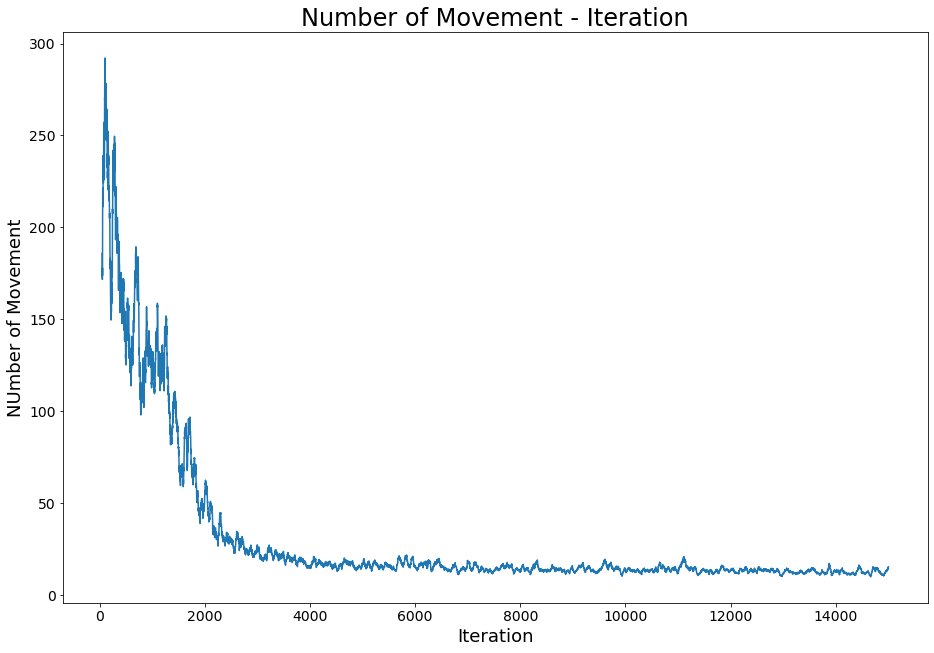

In [157]:
np.random.seed(10)
V,policy=SARSA(LAMBDA=1 ,n_episodes=15000)

In [160]:
V

{(0, 0, 0, 0): 0,
 (0, 0, 0, 1): 0,
 (0, 0, 0, 2): 0,
 (0, 0, 0, 3): 0,
 (0, 0, 0, 4): 0,
 (0, 0, 1, 0): 0,
 (0, 0, 1, 1): 0,
 (0, 0, 1, 2): 0,
 (0, 0, 1, 3): 0,
 (0, 0, 1, 4): 0,
 (0, 0, 2, 0): 0,
 (0, 0, 2, 1): 0,
 (0, 0, 2, 2): 0,
 (0, 0, 2, 3): 0,
 (0, 0, 2, 4): 0,
 (0, 0, 3, 0): 0,
 (0, 0, 3, 1): 0,
 (0, 0, 3, 2): 0,
 (0, 0, 3, 3): 0,
 (0, 0, 3, 4): 0,
 (0, 0, 4, 0): 0,
 (0, 0, 4, 1): 0,
 (0, 0, 4, 2): 0,
 (0, 0, 4, 3): 0,
 (0, 0, 4, 4): 0,
 (0, 1, 0, 0): 0,
 (0, 1, 0, 1): 0,
 (0, 1, 0, 2): 0,
 (0, 1, 0, 3): 0,
 (0, 1, 0, 4): 0,
 (0, 1, 1, 0): 0,
 (0, 1, 1, 1): 0,
 (0, 1, 1, 2): 0,
 (0, 1, 1, 3): 0,
 (0, 1, 1, 4): 0,
 (0, 1, 2, 0): 0,
 (0, 1, 2, 1): 0,
 (0, 1, 2, 2): 0,
 (0, 1, 2, 3): 0,
 (0, 1, 2, 4): 0,
 (0, 1, 3, 0): 0,
 (0, 1, 3, 1): 0,
 (0, 1, 3, 2): 0,
 (0, 1, 3, 3): 0,
 (0, 1, 3, 4): 0,
 (0, 1, 4, 0): 0,
 (0, 1, 4, 1): 0,
 (0, 1, 4, 2): 0,
 (0, 1, 4, 3): 0,
 (0, 1, 4, 4): 0,
 (0, 2, 0, 0): 0,
 (0, 2, 0, 1): 0,
 (0, 2, 0, 2): 0,
 (0, 2, 0, 3): 0,
 (0, 2, 0, 4): 0,
 (0, 2, 1,

In [161]:
policy

{(0, 0, 0, 0): 'DD',
 (0, 0, 0, 1): 'UD',
 (0, 0, 0, 2): 'ZU',
 (0, 0, 0, 3): 'ZU',
 (0, 0, 0, 4): 'DZ',
 (0, 0, 1, 0): 'UZ',
 (0, 0, 1, 1): 'DU',
 (0, 0, 1, 2): 'DZ',
 (0, 0, 1, 3): 'ZZ',
 (0, 0, 1, 4): 'ZU',
 (0, 0, 2, 0): 'ZD',
 (0, 0, 2, 1): 'DD',
 (0, 0, 2, 2): 'DD',
 (0, 0, 2, 3): 'ZZ',
 (0, 0, 2, 4): 'ZU',
 (0, 0, 3, 0): 'ZD',
 (0, 0, 3, 1): 'DZ',
 (0, 0, 3, 2): 'ZZ',
 (0, 0, 3, 3): 'UZ',
 (0, 0, 3, 4): 'ZZ',
 (0, 0, 4, 0): 'ZU',
 (0, 0, 4, 1): 'UU',
 (0, 0, 4, 2): 'ZU',
 (0, 0, 4, 3): 'DU',
 (0, 0, 4, 4): 'UZ',
 (0, 1, 0, 0): 'ZU',
 (0, 1, 0, 1): 'DD',
 (0, 1, 0, 2): 'ZD',
 (0, 1, 0, 3): 'ZZ',
 (0, 1, 0, 4): 'DD',
 (0, 1, 1, 0): 'UD',
 (0, 1, 1, 1): 'UD',
 (0, 1, 1, 2): 'DD',
 (0, 1, 1, 3): 'DD',
 (0, 1, 1, 4): 'ZZ',
 (0, 1, 2, 0): 'UU',
 (0, 1, 2, 1): 'UU',
 (0, 1, 2, 2): 'ZD',
 (0, 1, 2, 3): 'ZU',
 (0, 1, 2, 4): 'UD',
 (0, 1, 3, 0): 'DZ',
 (0, 1, 3, 1): 'UU',
 (0, 1, 3, 2): 'UZ',
 (0, 1, 3, 3): 'UZ',
 (0, 1, 3, 4): 'ZZ',
 (0, 1, 4, 0): 'DU',
 (0, 1, 4, 1): 'ZU',
 (0, 1, 4, 2)